# Problem Statement:
AUS-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not.

## Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [1]:
## importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
### importing dataset:
df=pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df.shape

(1168, 81)

The Train data set has 1168 rows and 81 columns including target variable. 


In [5]:
## checking duplicates
df.duplicated().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- Seems there is some columns has nulls values present.
- The  dataset is mix of object,numeric and floating data types feature.
- The number of columns are quite good in this dataset.

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Understanding the Stats of the Dataset:

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## observations:
- There are some features have missing value so we have to treat them accordingly.
- We can see the the first feature 'ID' is nomial data type i.e. it is only a unique id number and it is only for name-sake. So we will drop them going ahead.
- 'MS SubClass','LotFrontage','LotArea' features maximum value didn't match with minimum value. The differece is very high in both of them, seems there is some outliers present in our dataset so we will take care of it later.


In [9]:
## checking correlation:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000469,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.077630,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,0.123943,0.386261,0.448186,0.099250,0.007885,0.410414,0.104255,0.001528,0.189321,0.053168,0.264010,-0.002890,0.351969,0.262076,0.061101,0.276798,0.344908,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034981,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.541719,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.318278,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.826366,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.639153,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,0.109850,0.366833,0.339938,0.173358,-0.070518,0.387891,0.086720,0.014198,0.268545,0.200926,0.091717,-0.038281,0.279391,0.243812,0.254547,0.342553,0.365849,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.135558,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.

The number of the features are very high so it is difficult to find correlation in this way. We will use some another technique to find the relation between the features.

In [10]:
### droppinng unwanted columns;
df.drop('Id',axis=1,inplace=True)

### Checking Null Values:/

In [11]:
for i in df.columns:
    if df[i].isna().any()==True:
        print("************{}***************".format(i))
        print(df[i].isna().sum())

************LotFrontage***************
214
************Alley***************
1091
************MasVnrType***************
7
************MasVnrArea***************
7
************BsmtQual***************
30
************BsmtCond***************
30
************BsmtExposure***************
31
************BsmtFinType1***************
30
************BsmtFinType2***************
31
************FireplaceQu***************
551
************GarageType***************
64
************GarageYrBlt***************
64
************GarageFinish***************
64
************GarageQual***************
64
************GarageCond***************
64
************PoolQC***************
1161
************Fence***************
931
************MiscFeature***************
1124


- There are some features having more than 80% nulls present. We have to handle them.

In [12]:
for i in df.columns:
    if df[i].dtypes=='object':
        print("###########{}############".format(i))
        print(df[i].value_counts())

###########MSZoning############
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
###########Street############
Pave    1164
Grvl       4
Name: Street, dtype: int64
###########Alley############
Grvl    41
Pave    36
Name: Alley, dtype: int64
###########LotShape############
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
###########LandContour############
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
###########Utilities############
AllPub    1168
Name: Utilities, dtype: int64
###########LotConfig############
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
###########LandSlope############
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
###########Neighborhood############
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      5

- We can see that 'Untitles' feature fill with one single data point. So we will drop it right now.
- Also we can see that most of the features having 90 or more than 90% of unique value since they are not adding any value so we will drop them

In [13]:
df.drop('Utilities',axis=1,inplace=True)

## Handing Missing Values:

In [14]:
## dropping those columns where maximum value of that particular column having holding 90% data.
Empty_list=[]
for i in df.columns:
    if df[i].value_counts().max()>len(df.index)*85/100:
        Empty_list.append(i)
        df.drop(i,axis=1,inplace=True)
print("Total Number of Column removed : ", len(Empty_list))
print("Removing columns names are : ", Empty_list)

Total Number of Column removed :  26
Removing columns names are :  ['Street', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType']


In [15]:
## now shape is 
df.shape

(1168, 53)

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleCondition,SalePrice
0,120,RL,NaN,4928,NaN,IR1,Inside,NPkVill,TwnhsE,1Story,6,5,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,CBlock,Gd,No,ALQ,120,958,1078,TA,958,0,958,0,2,0,2,TA,5,1,TA,Attchd,1977.0,RFn,2,440,0,205,NaN,NaN,NaN,2,2007,Normal,128000
1,20,RL,95.0,15865,NaN,IR1,Inside,NAmes,1Fam,1Story,8,6,1970,1970,Flat,Wd Sdng,Wd Sdng,None,0.0,Gd,PConc,TA,Gd,ALQ,351,1043,2217,Ex,2217,0,2217,1,2,0,4,Gd,8,1,TA,Attchd,1970.0,Unf,2,621,81,207,NaN,NaN,NaN,10,2007,Normal,268000
2,60,RL,92.0,9920,NaN,IR1,CulDSac,NoRidge,1Fam,2Story,7,5,1996,1997,Gable,MetalSd,MetalSd,None,0.0,Gd,PConc,Gd,Av,GLQ,862,255,1117,Ex,1127,886,2013,1,2,1,3,TA,8,1,TA,Attchd,1997.0,Unf,2,455,180,130,NaN,NaN,NaN,6,2007,Normal,269790
3,20,RL,105.0,11751,NaN,IR1,Inside,NWAmes,1Fam,1Story,6,6,1977,1977,Hip,Plywood,Plywood,BrkFace,480.0,TA,CBlock,Gd,No,BLQ,705,1139,1844,Ex,1844,0,1844,0,2,0,3,TA,7,1,TA,Attchd,1977.0,RFn,2,546,0,122,NaN,MnPrv,NaN,1,2010,Normal,190000
4,20,RL,NaN,16635,NaN,IR1,FR2,NWAmes,1Fam,1Story,6,7,1977,2000,Gable,CemntBd,CmentBd,Stone,126.0,Gd,CBlock,Gd,No,ALQ,1246,356,1602,Gd,1602,0,1602,0,2,0,3,Gd,8,1,TA,Attchd,1977.0,Fin,2,529,240,0,NaN,NaN,NaN,6,2009,Normal,215000


In [17]:
### Checking nulls again:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Alley            1091
LotShape            0
LotConfig           0
Neighborhood        0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
Foundation          0
BsmtQual           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu       551
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchS

- Some features having high count of missing value so it is better to  fill those null values we will simply drop them , since they lead our model to biasness.

In [18]:
dropping_columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
df.drop(columns=dropping_columns,inplace=True)

## Filling NaN's

In [19]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print("*****{}*****".format(i))
        print(df[i].isna().sum())

*****LotFrontage*****
214
*****MasVnrType*****
7
*****MasVnrArea*****
7
*****BsmtQual*****
30
*****BsmtExposure*****
31
*****BsmtFinType1*****
30
*****GarageType*****
64
*****GarageYrBlt*****
64
*****GarageFinish*****
64


- ** LotFrontage and MasVnrArea are continous data type:
- ** Rest all of them are categorical data type , so we will fill those categorical feature high accuring value.

##### MasVnrType

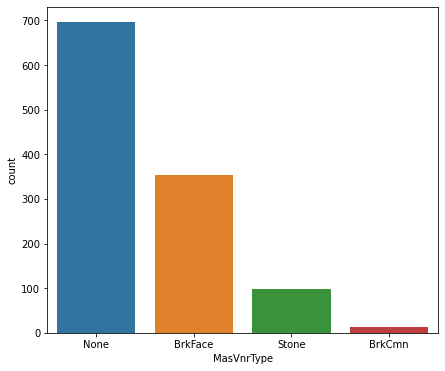

In [20]:
plt.figure(figsize=(7,6))
sns.countplot(df.MasVnrType)

plt.show()

- Here None type of MasVnr count is highest of them so we will replace all null values with None.

#### BsmtQual

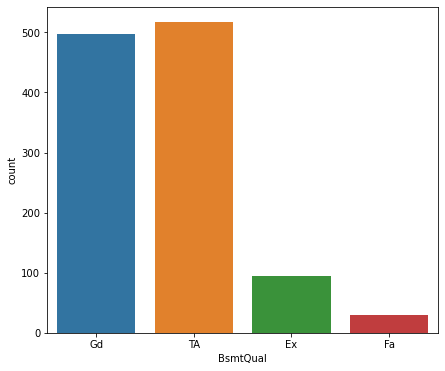

In [21]:
plt.figure(figsize=(7,6))
sns.countplot(df.BsmtQual)

plt.show()

#### BsmtExposure

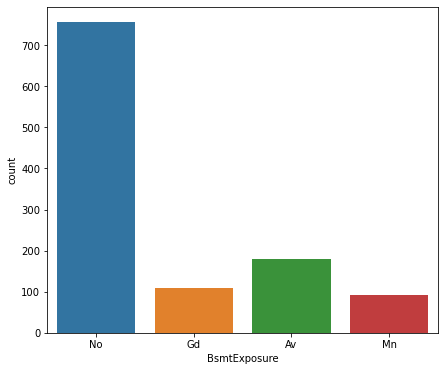

In [22]:
plt.figure(figsize=(7,6))
sns.countplot(df.BsmtExposure)

plt.show()

#### BsmtFinType1

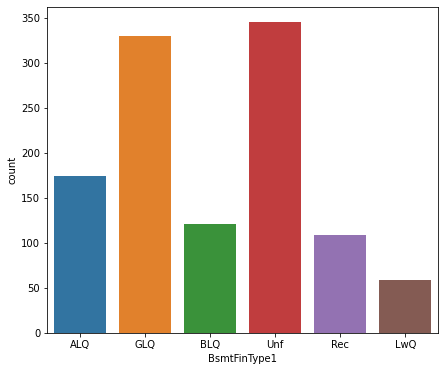

In [23]:
plt.figure(figsize=(7,6))
sns.countplot(df.BsmtFinType1)

plt.show()

### GarageType

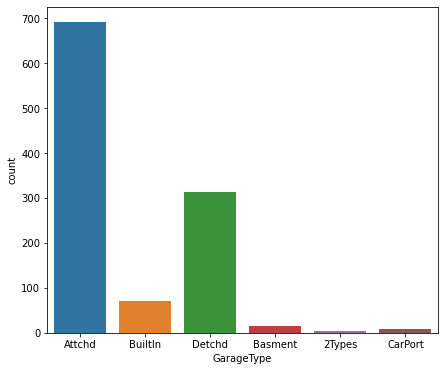

In [24]:
plt.figure(figsize=(7,6))
sns.countplot(df['GarageType'])

plt.show()

#### GarageYrBlt

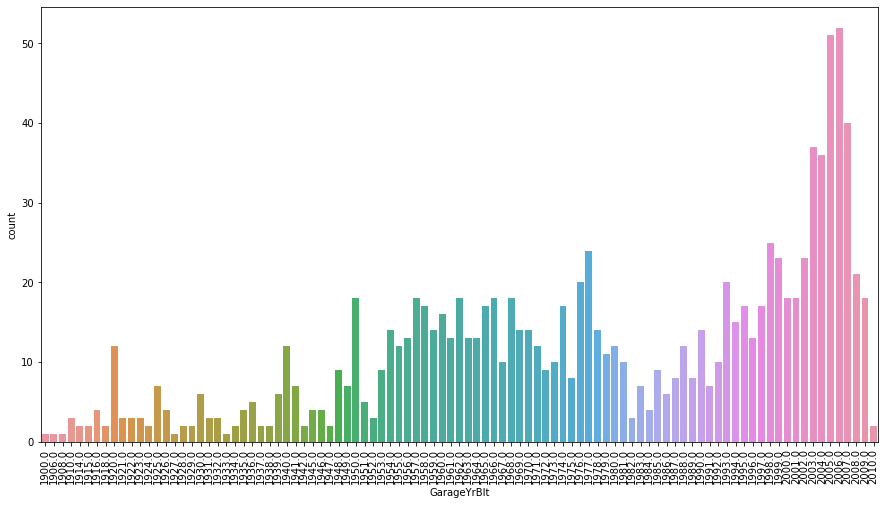

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(df['GarageYrBlt'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

#### GarageFinish

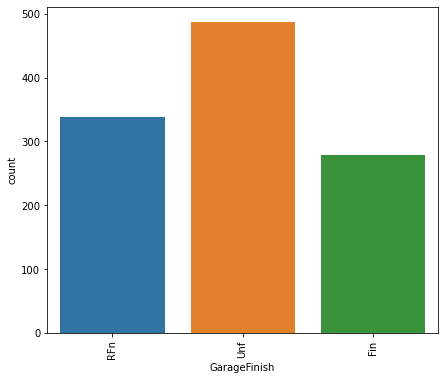

In [26]:
plt.figure(figsize=(7,6))
sns.countplot(df['GarageFinish'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [27]:
# Replacing the values of Categorical Columns with the mode.

df.GarageFinish=df.GarageFinish.fillna(df.GarageFinish.mode()[0])
df.MasVnrType=df.MasVnrType.fillna(df.MasVnrType.mode()[0])
df.GarageYrBlt=df.GarageYrBlt.fillna(df.GarageYrBlt.mode()[0])
df.GarageType=df.GarageType.fillna(df.GarageType.mode()[0])
df.BsmtFinType1=df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0])
df.BsmtQual=df.BsmtQual.fillna(df.BsmtQual.mode()[0])
df.BsmtExposure=df.BsmtExposure.fillna(df.BsmtExposure.mode()[0])

In [28]:
# Replacing the values of continous Columns with the mean.
df.LotFrontage=df.LotFrontage.fillna(df.LotFrontage.mean())
df.MasVnrArea=df.MasVnrArea.fillna(df.MasVnrArea.mean())

In [29]:
## Checking nullls now:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

##### We have fill all the missing value in my dataset according to their data type.

let's see some graphical analysis:

## Visualization:

First of all we will split our feature into numeric and categorical data type, it will help  us to understand and visualize the data.

In [30]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType        object
GarageYrBlt      float64
GarageFinish      object


In [31]:
cat_features=[]
num_features=[]
for  i in df.columns:
    if df[i].dtypes=='object':
        cat_features.append(i)
    else:
        num_features.append(i)
        

In [32]:
print(cat_features)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


In [33]:
print(num_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']


In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,120,RL,70.98847,4928,IR1,Inside,NPkVill,TwnhsE,1Story,6,5,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,CBlock,Gd,No,ALQ,120,958,1078,TA,958,0,958,0,2,0,2,TA,5,1,Attchd,1977.0,RFn,2,440,0,205,2,2007,Normal,128000
1,20,RL,95.00000,15865,IR1,Inside,NAmes,1Fam,1Story,8,6,1970,1970,Flat,Wd Sdng,Wd Sdng,None,0.0,Gd,PConc,TA,Gd,ALQ,351,1043,2217,Ex,2217,0,2217,1,2,0,4,Gd,8,1,Attchd,1970.0,Unf,2,621,81,207,10,2007,Normal,268000
2,60,RL,92.00000,9920,IR1,CulDSac,NoRidge,1Fam,2Story,7,5,1996,1997,Gable,MetalSd,MetalSd,None,0.0,Gd,PConc,Gd,Av,GLQ,862,255,1117,Ex,1127,886,2013,1,2,1,3,TA,8,1,Attchd,1997.0,Unf,2,455,180,130,6,2007,Normal,269790
3,20,RL,105.00000,11751,IR1,Inside,NWAmes,1Fam,1Story,6,6,1977,1977,Hip,Plywood,Plywood,BrkFace,480.0,TA,CBlock,Gd,No,BLQ,705,1139,1844,Ex,1844,0,1844,0,2,0,3,TA,7,1,Attchd,1977.0,RFn,2,546,0,122,1,2010,Normal,190000
4,20,RL,70.98847,16635,IR1,FR2,NWAmes,1Fam,1Story,6,7,1977,2000,Gable,CemntBd,CmentBd,Stone,126.0,Gd,CBlock,Gd,No,ALQ,1246,356,1602,Gd,1602,0,1602,0,2,0,3,Gd,8,1,Attchd,1977.0,Fin,2,529,240,0,6,2009,Normal,215000


## Numerical Data:

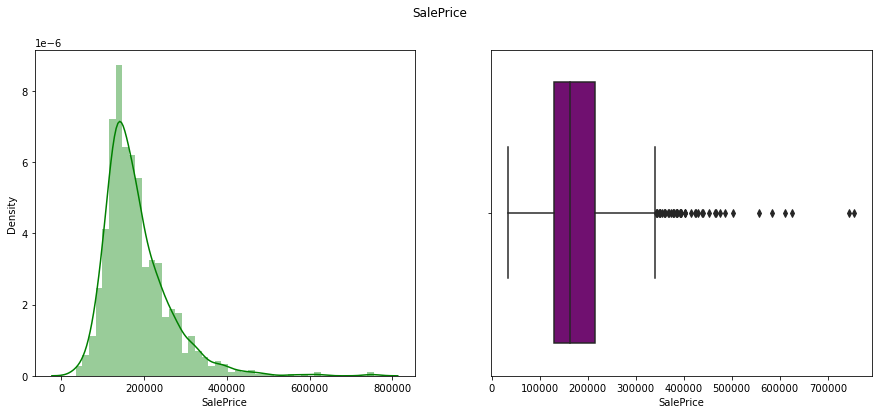

In [35]:
## Target variable: SalePrice
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df.SalePrice,color='g')

plt.subplot(1,2,2)
sns.boxplot(df.SalePrice,color='purple')
plt.suptitle('SalePrice',fontsize=12)
plt.show()

- here we can see that our target variable highly right skewed and also we can see that there are lot off outliers present. We have to take care of that before model building.

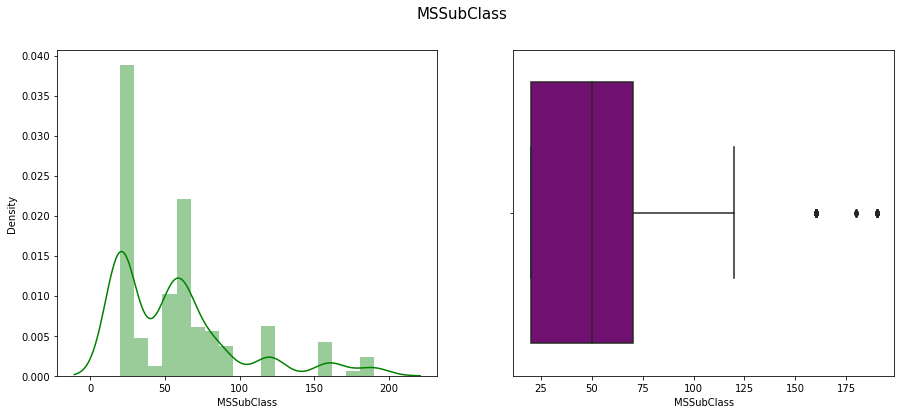

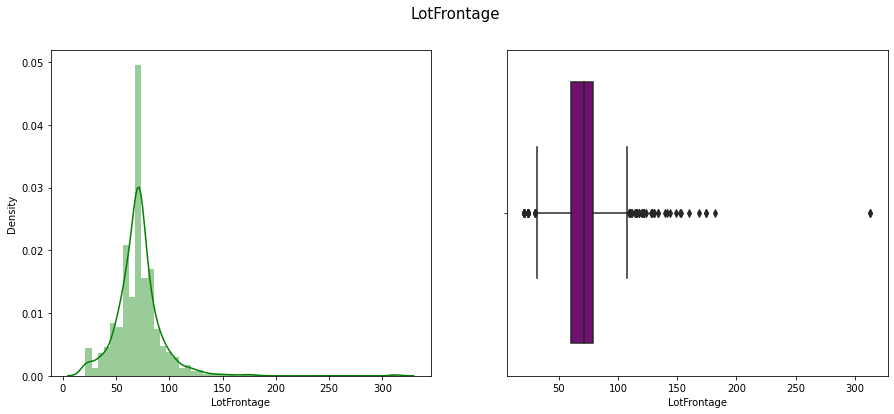

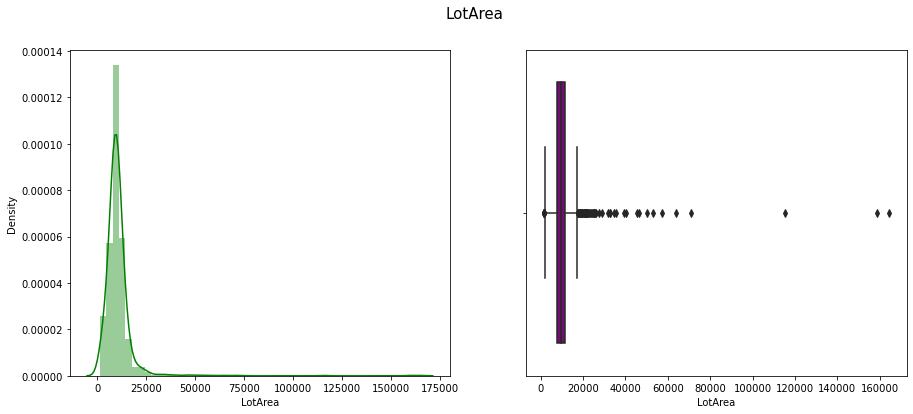

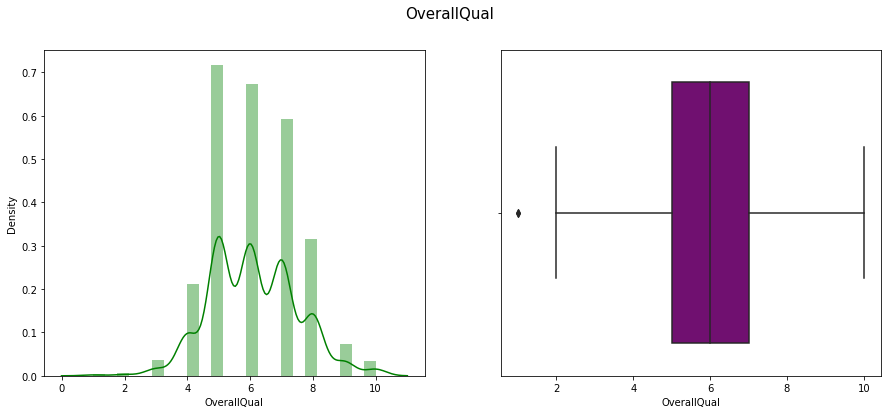

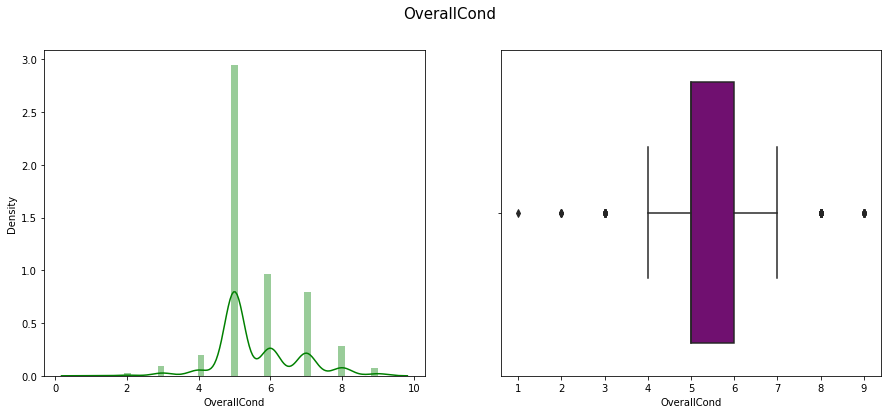

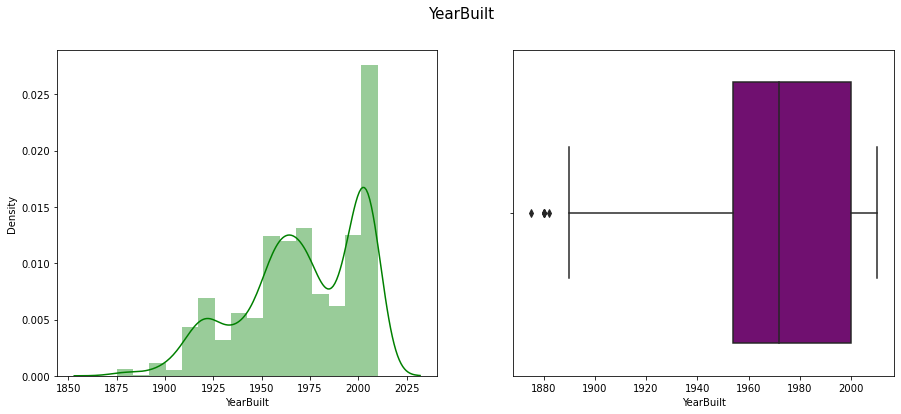

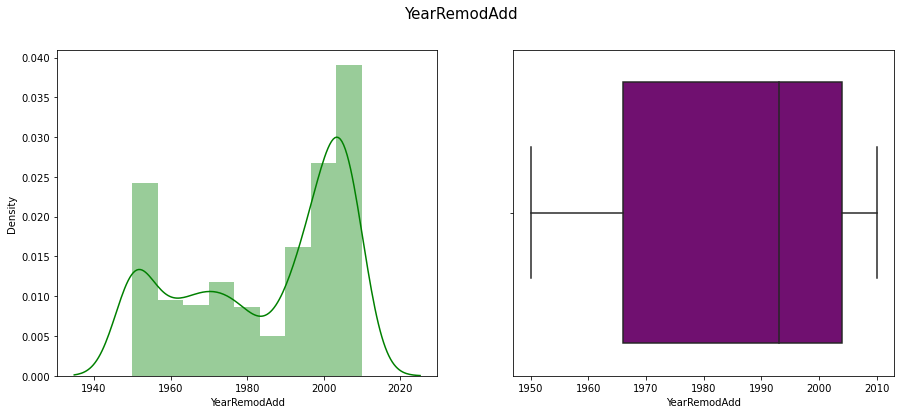

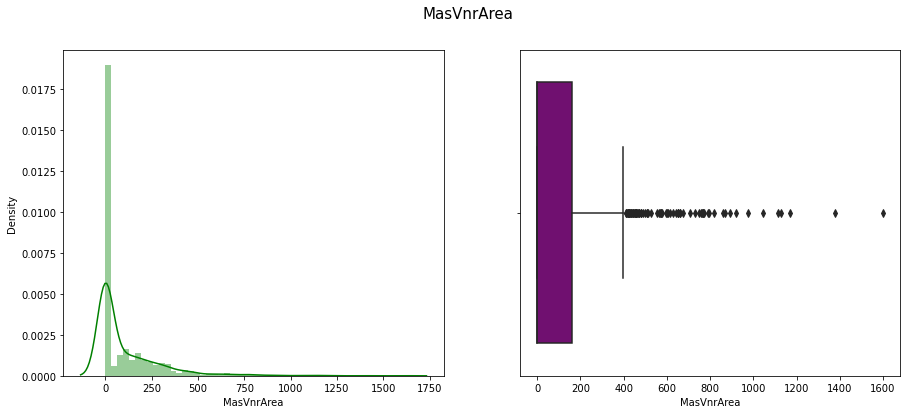

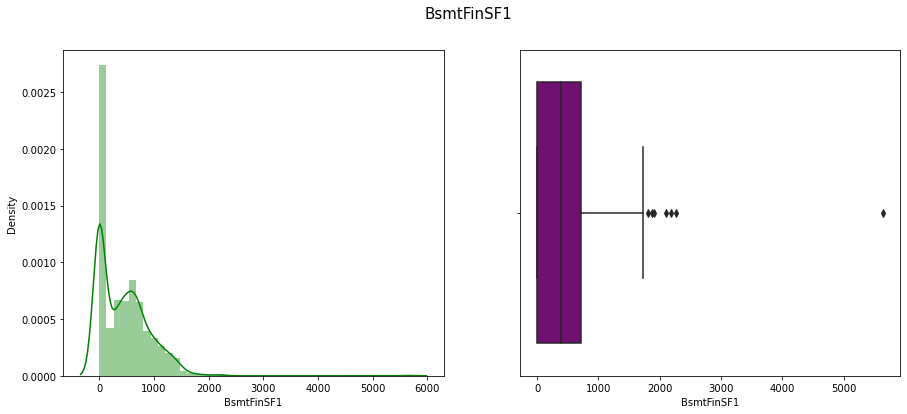

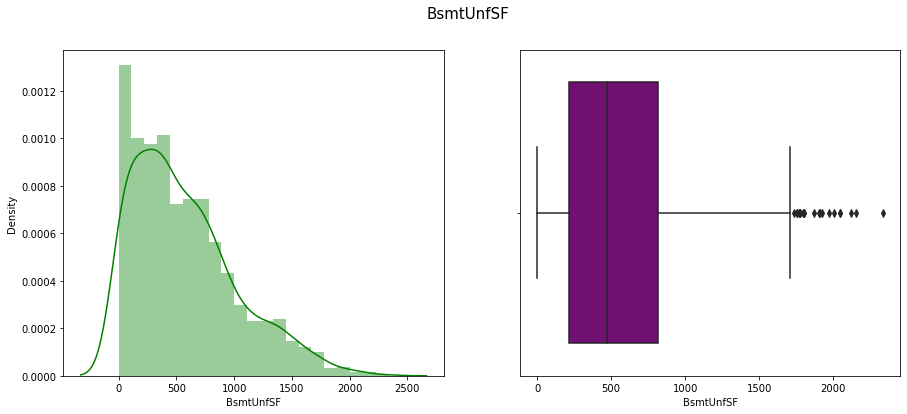

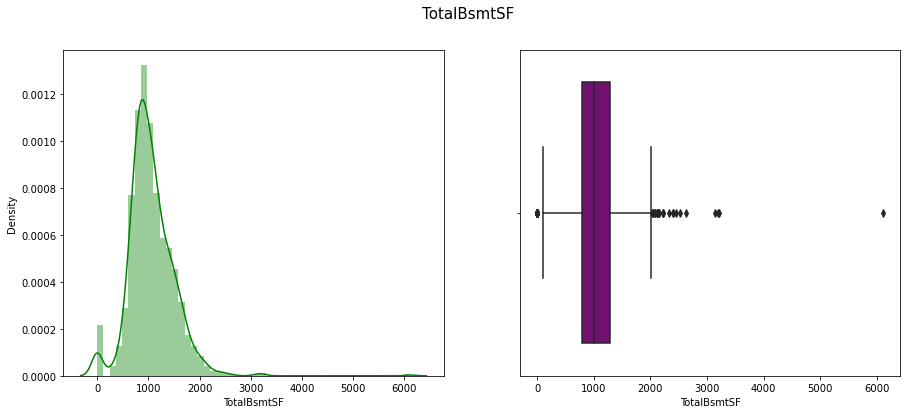

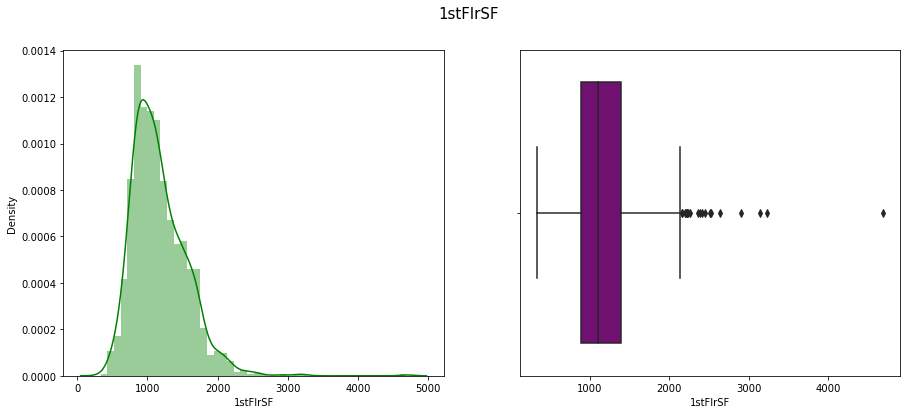

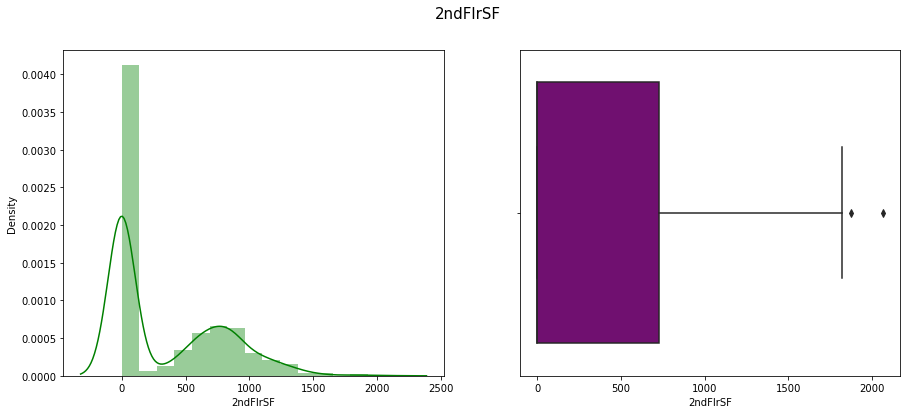

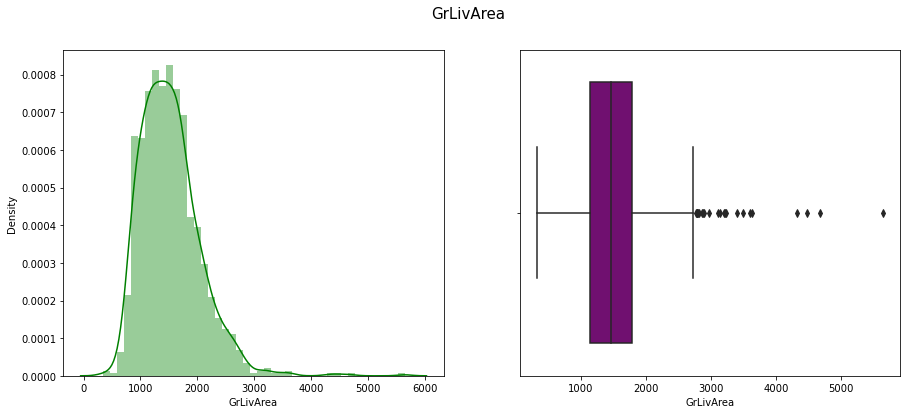

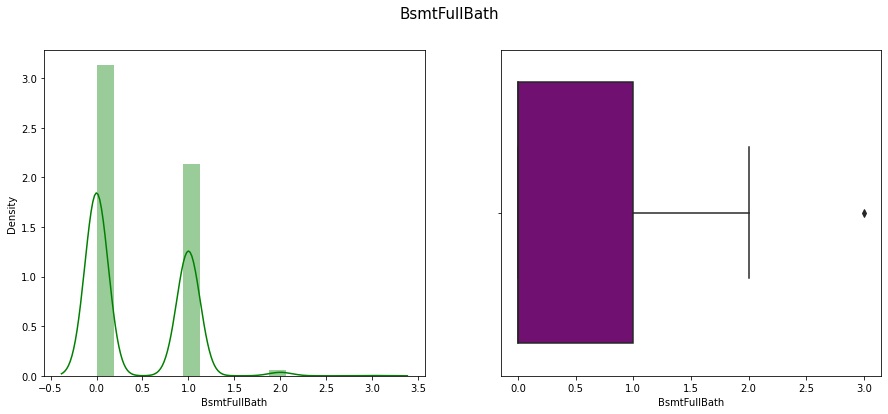

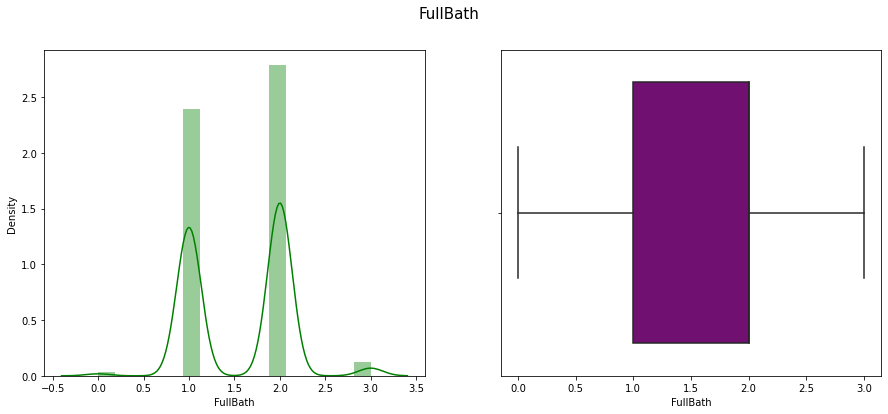

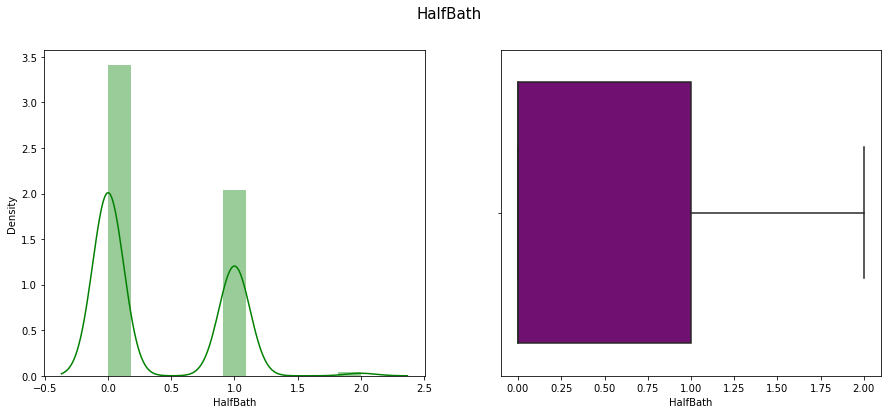

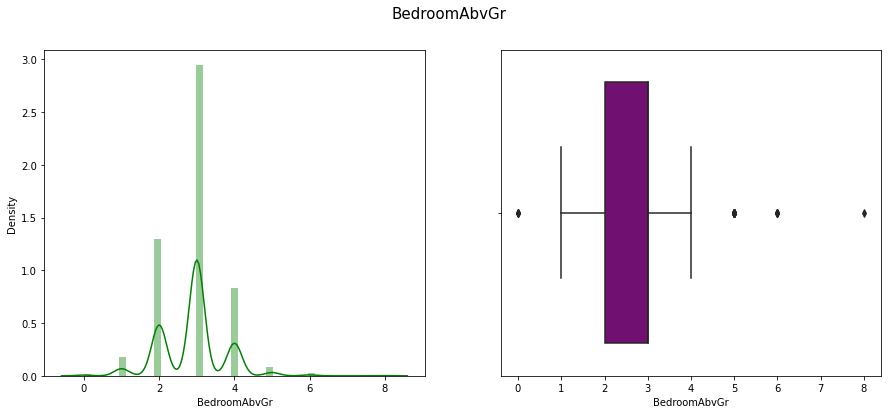

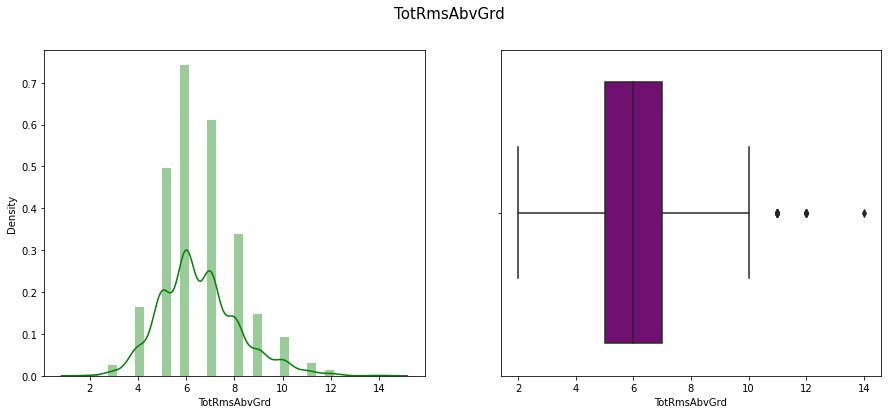

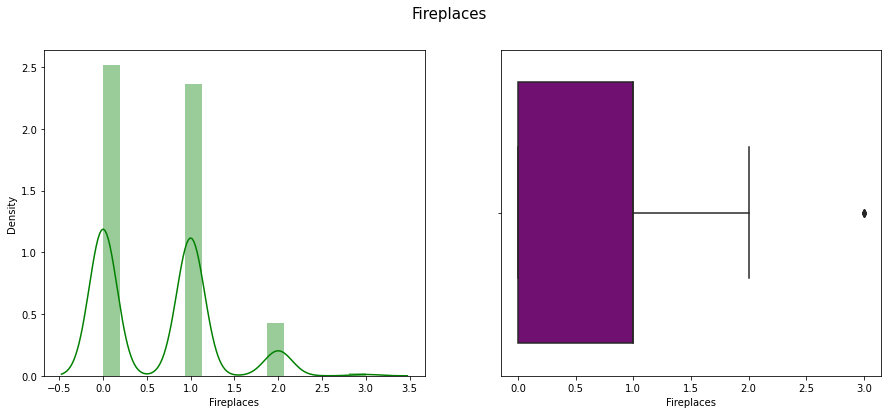

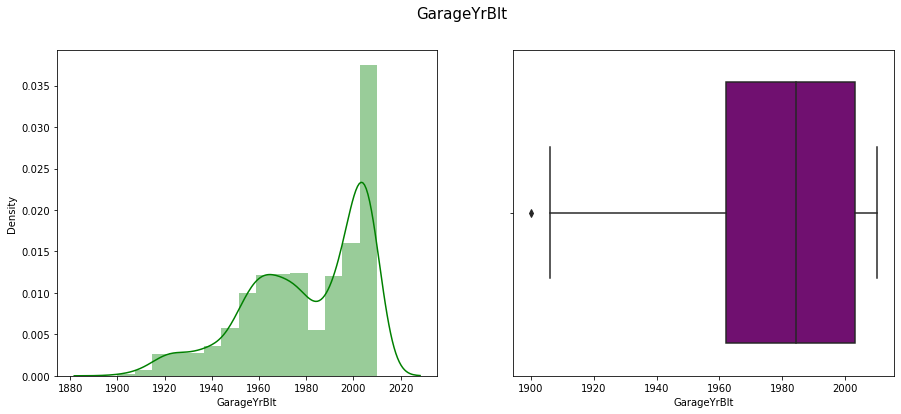

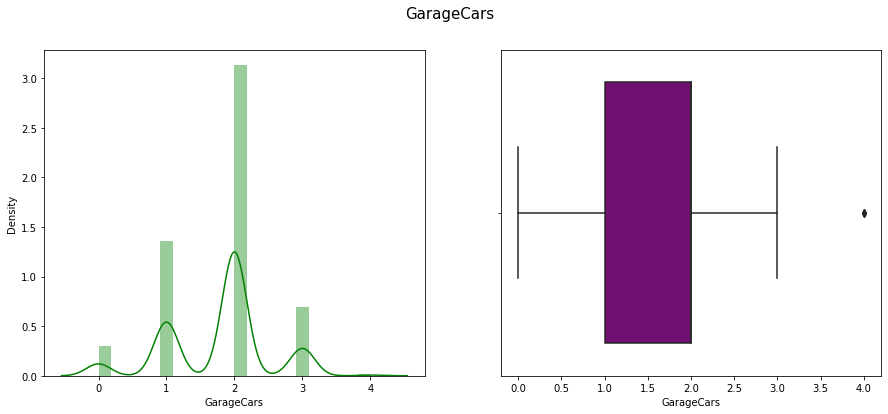

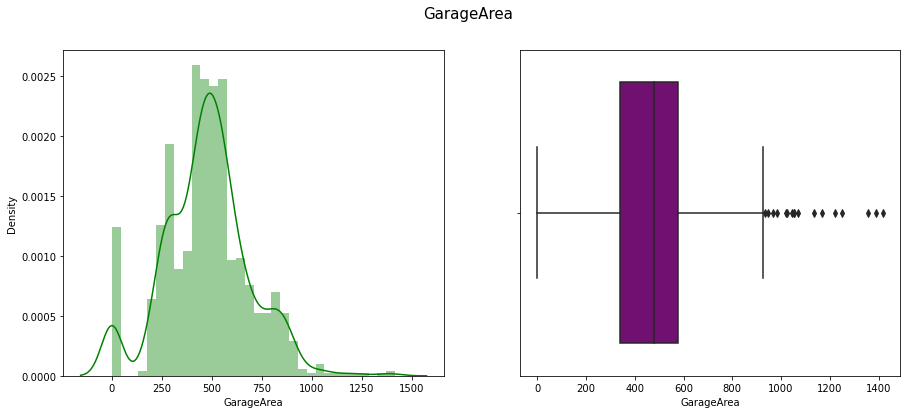

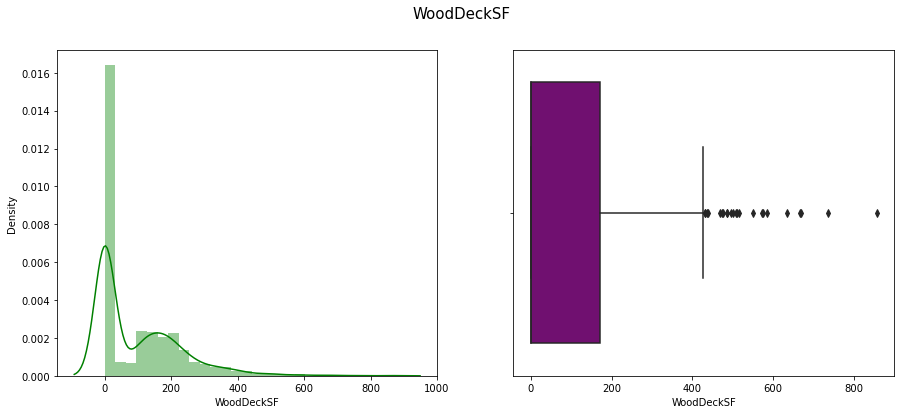

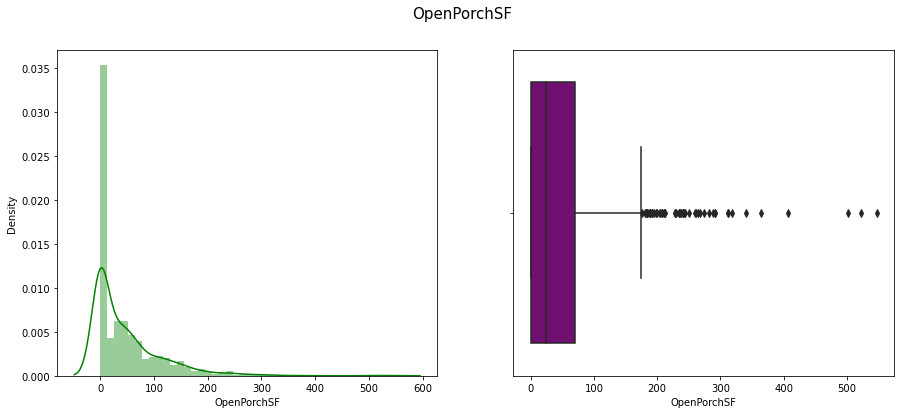

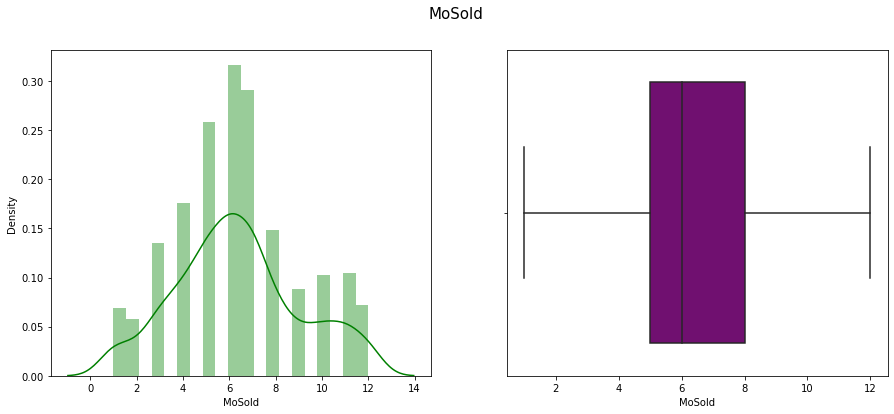

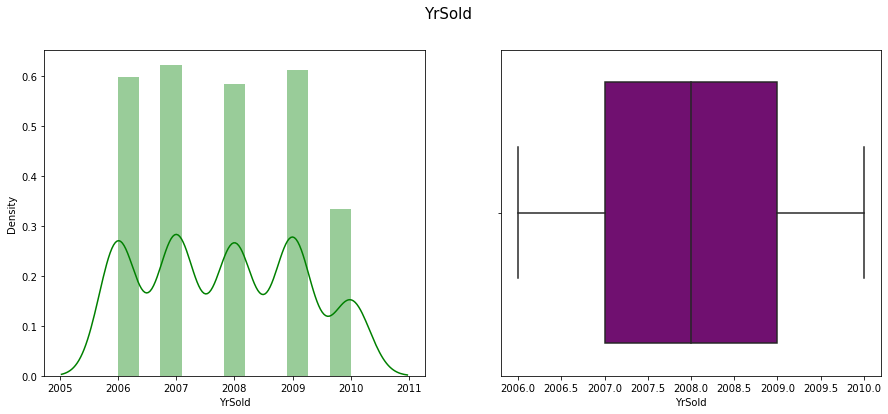

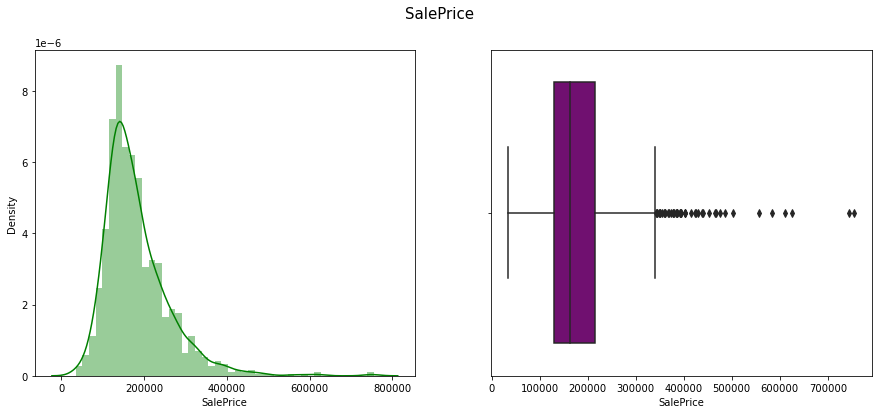

In [36]:
for i in num_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.distplot(df[i],color='g')

    plt.subplot(1,2,2)
    sns.boxplot(df[i],color='purple')    
    plt.suptitle(i,fontsize=15)
    plt.show()

### Observations:
- `LotFrontage`,`LotArea`,`MasVnrArea`,`BsmtFinSF1`,`TotalBSmtSF`,`GrLivArea`,`WoodDeckSF`,`OpenPorchSF` Features are highly right skewed. We will use some transformation technique to remove their skewness.
- Also we can see that there are some features having lot of outliers present. As we have less data for training so that we have to take care of data loss when we remove the outliers.

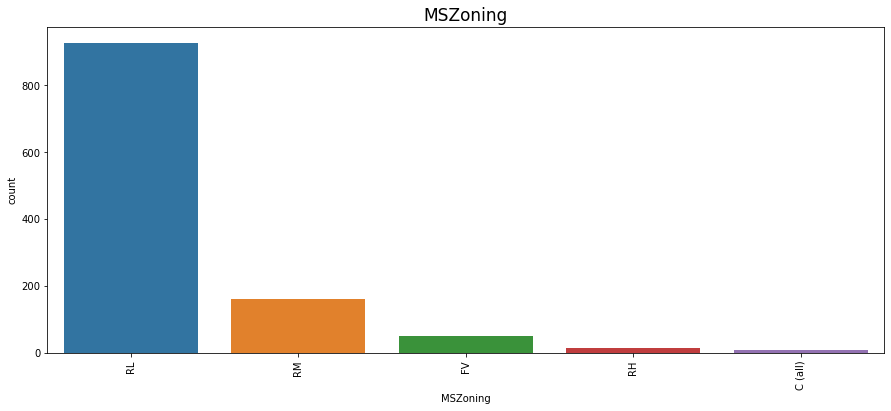

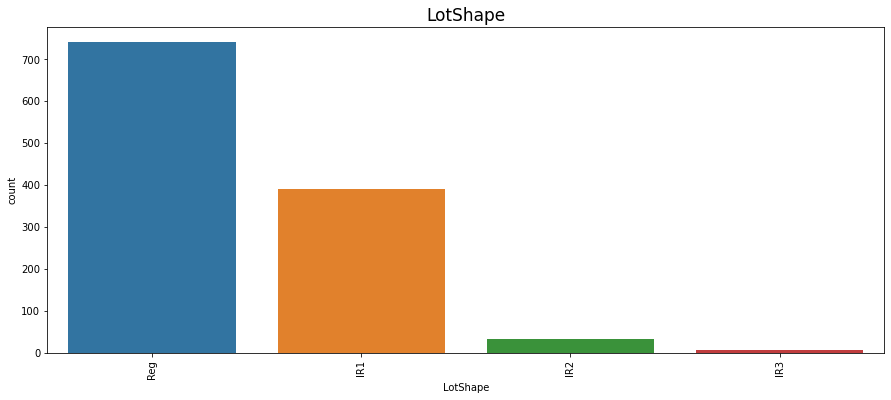

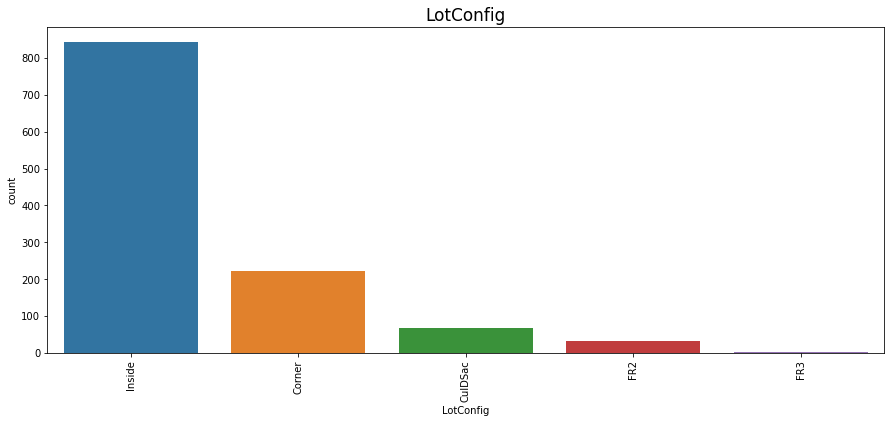

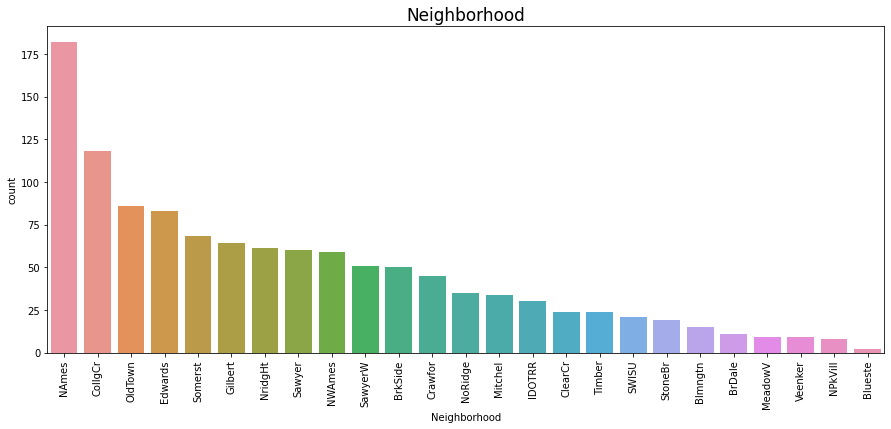

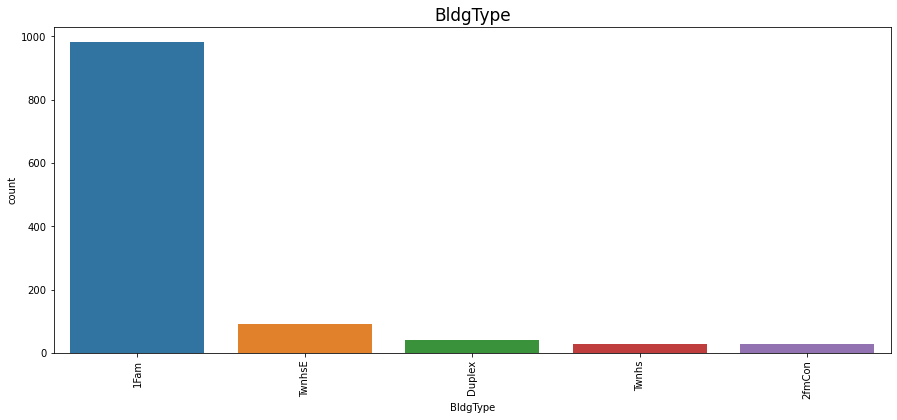

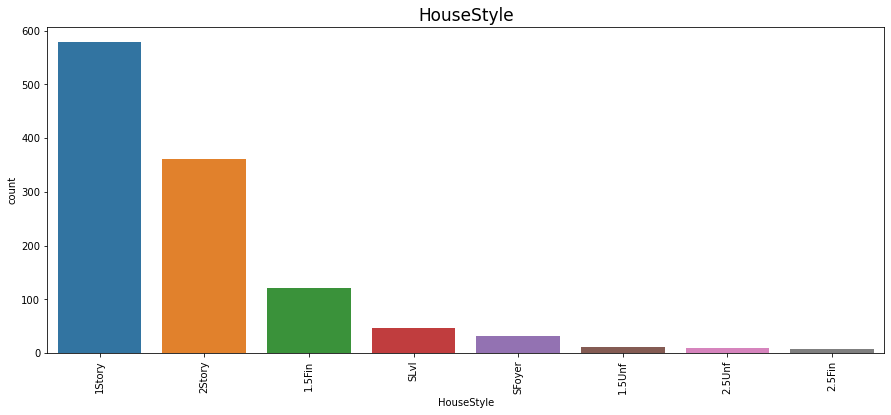

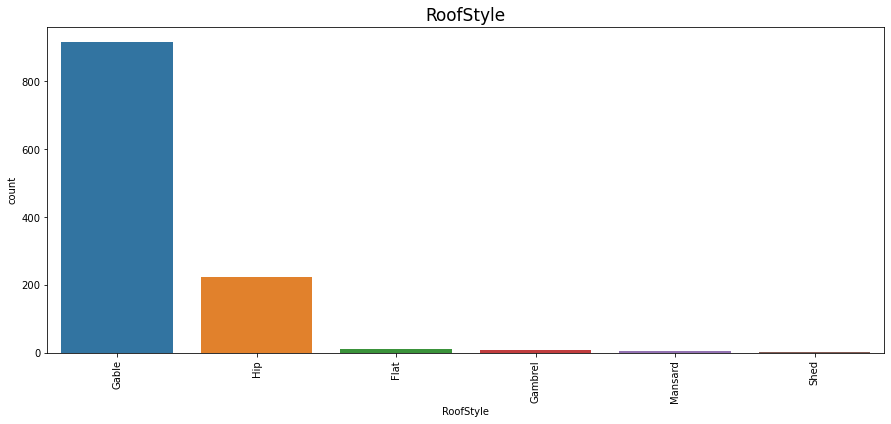

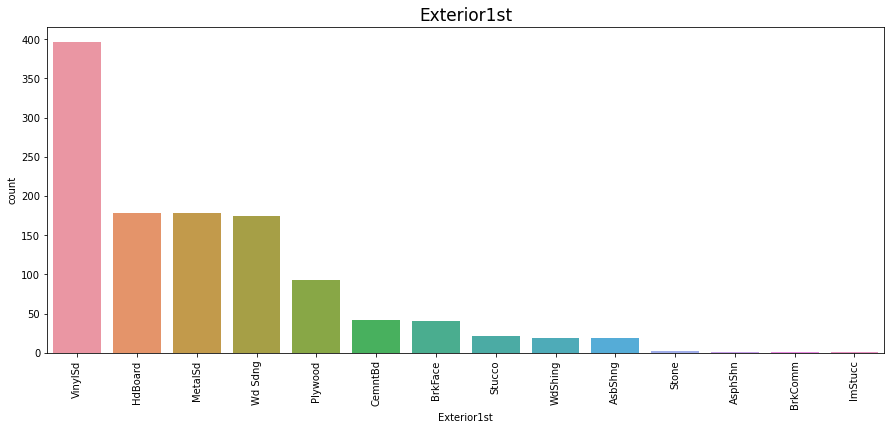

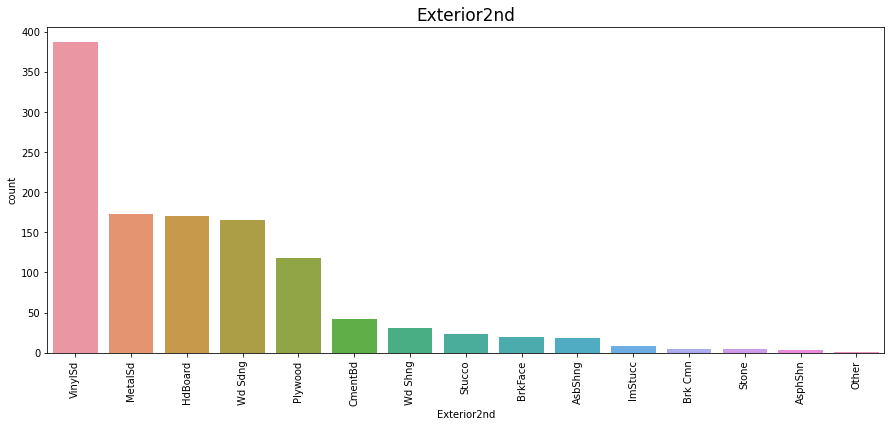

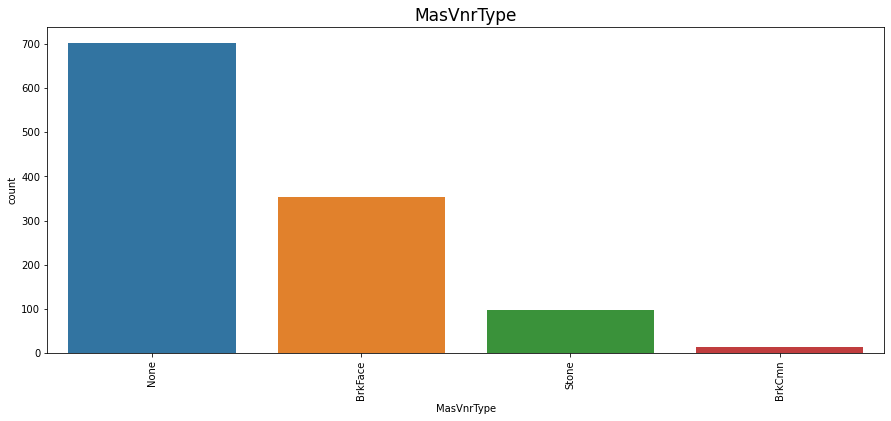

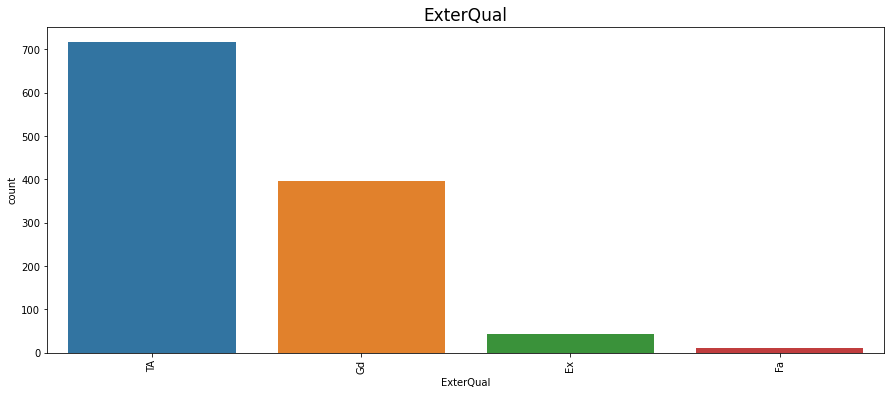

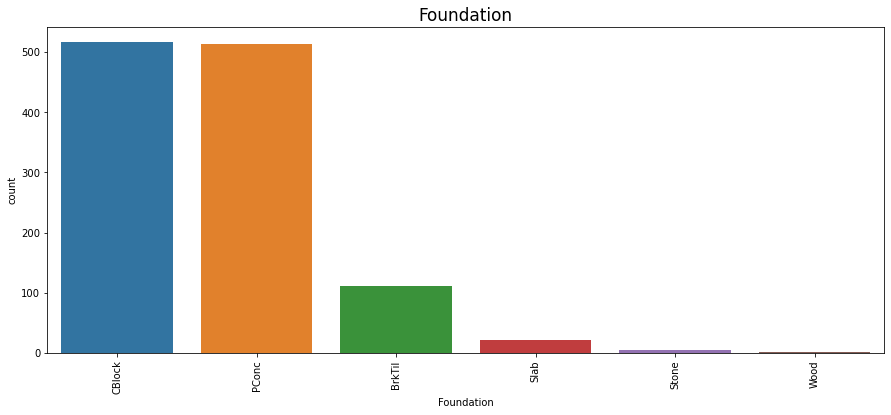

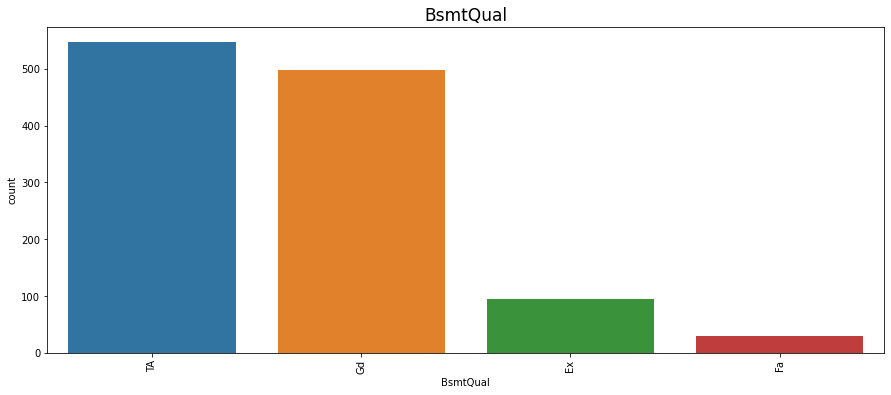

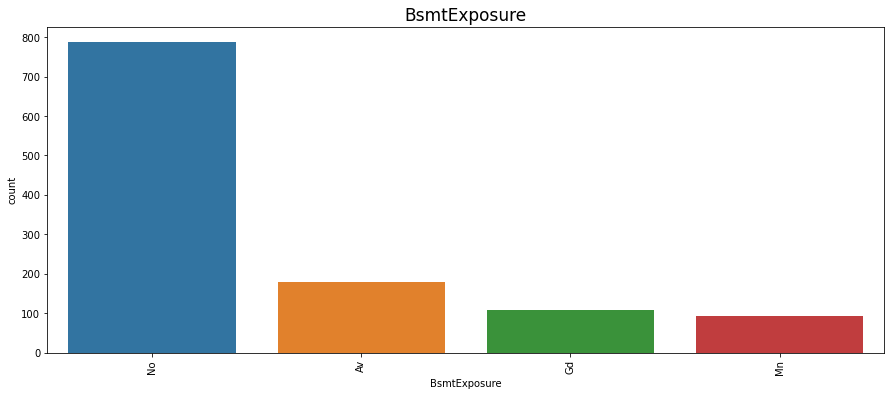

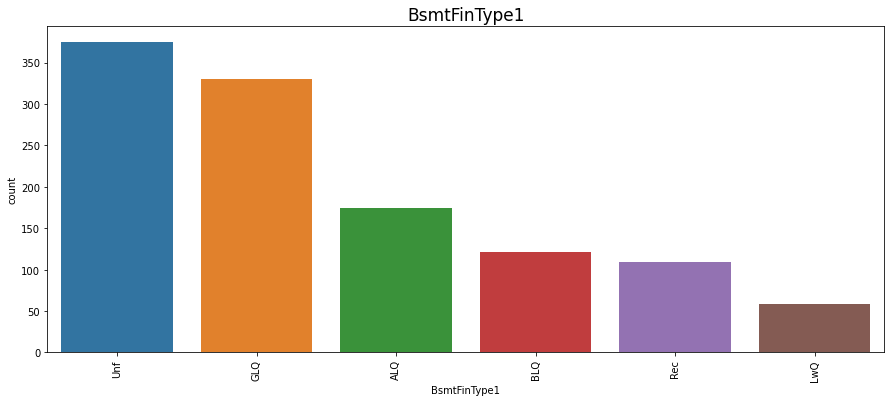

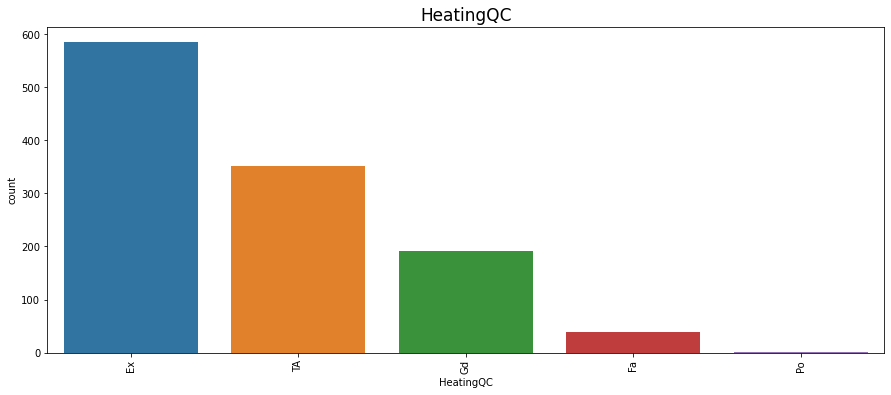

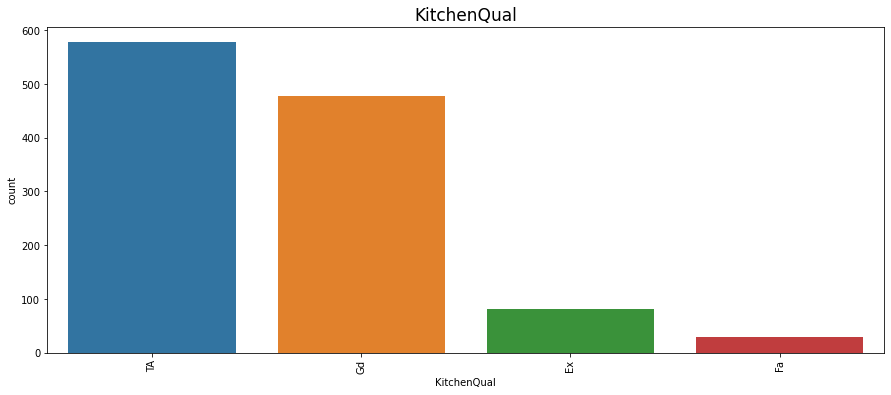

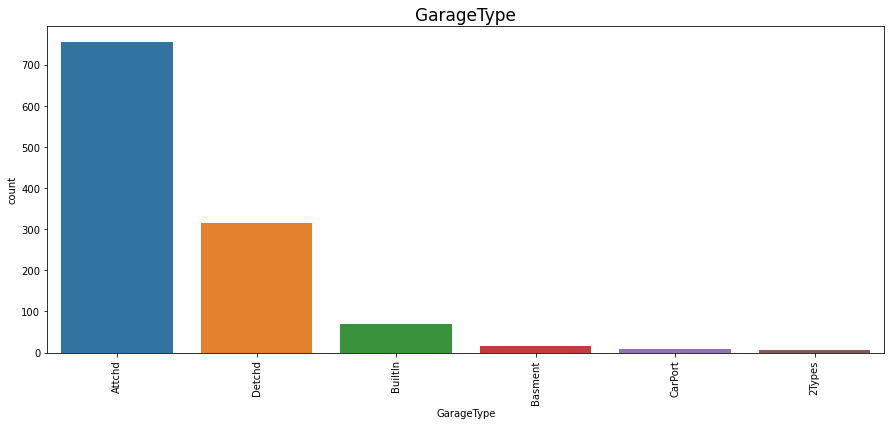

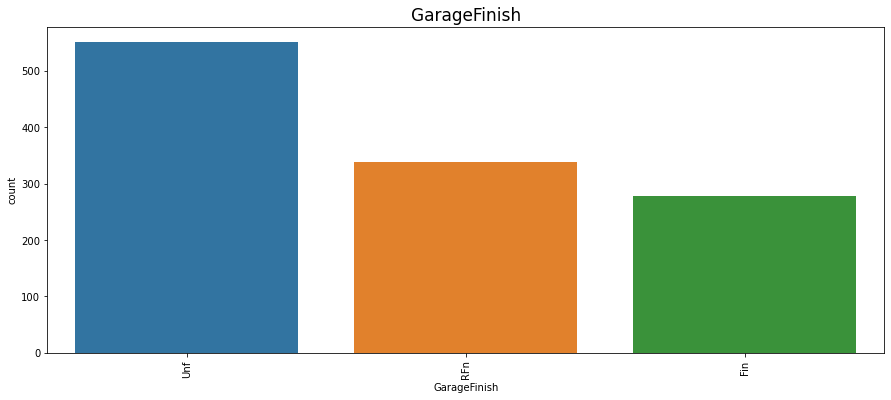

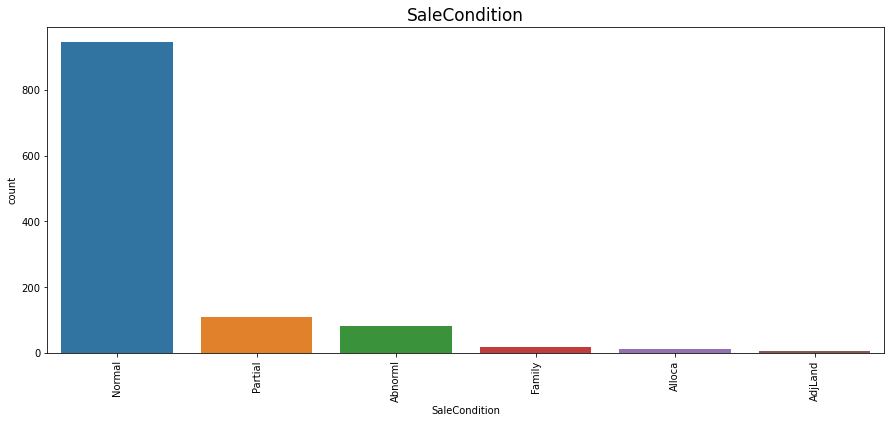

In [37]:
for i in cat_features:
    plt.figure(figsize=(15,6))
    sns.countplot( x=df[i], order=df[i].value_counts().index, hue=None)
    plt.xticks(rotation=90)
    plt.title(i,fontsize=17)
    plt.show()

### Observations:

- We can see there are no outliers in all the categorical features.
- `BsmtFullBath` has low amount of data, and values are: 0,1,2,3 only.
- `SaleCondition` has highest count of data in Normal attribute.
- There are Mostly Attached Garage available.
- `BedroomAbvGr` sihas low amount of data, and values are: 0,1,2,3 only.
- `FullBath` has low amount of data, and values are from 0 to 8.
- `TotRmsAbvGrd` has low amount of data, and values are from 0 to 14.
- Mostly rooftype global selected.
- `Fireplaces` has low amount of data, and values are 0,1,2 3.
- 

## Relation With Target Variable:

#### Numerical Features Vs Target 

In [38]:
len(num_features)

28

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

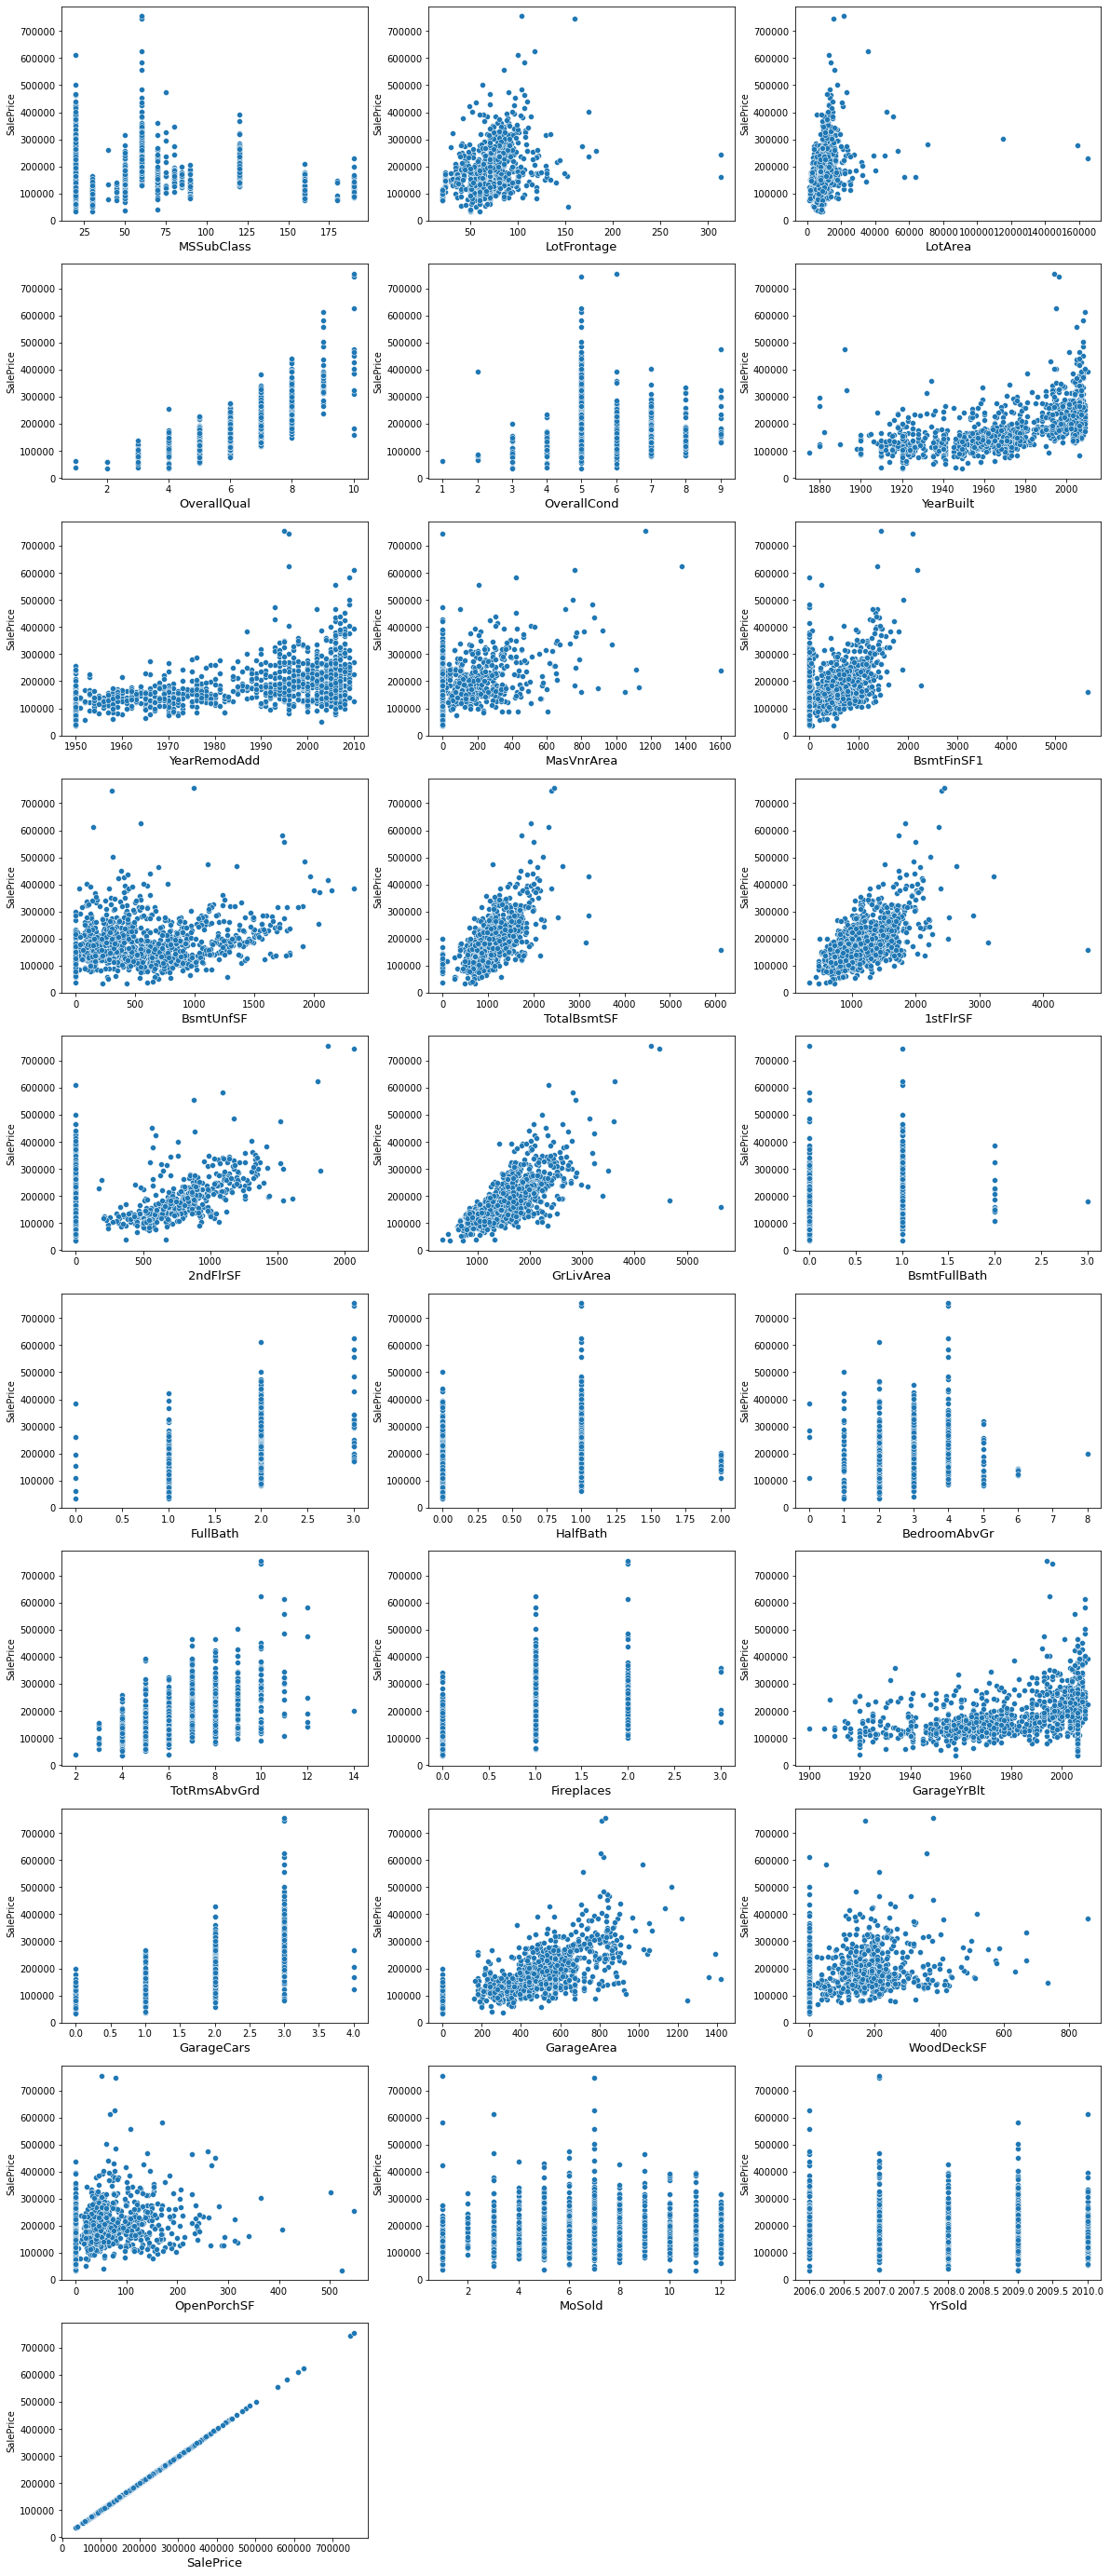

In [39]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=50:
        ax=plt.subplot(10,3,plotnumber)
        sns.scatterplot(y=df.SalePrice,x=df[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.tight_layout

### Observations:-
- `BsmtUnfSF`,`TotalBsmtSF`,`lstFirSF`,`GrLivArea`,`GarageArea` , these features are showing high correlation with the target variable. We can see in the graph, as these quantity increases the Saleprice is also increase.
- `BSmtFinSF1`,`BsmtUnfSF`,`TotalBsmtSF`,`2ndFlrSF`, `BsmtFullBath`,`Fireplaces` and `OpenPorchSF`, we can see that At '0' these feature are showing strange relationship with target variable but as quantity  increasing the saleprice is also increasing. We assume that there are some lower outlier in these features at point 0. We will see that later.

### Categorical Features:

In [40]:
len(cat_features)

20

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

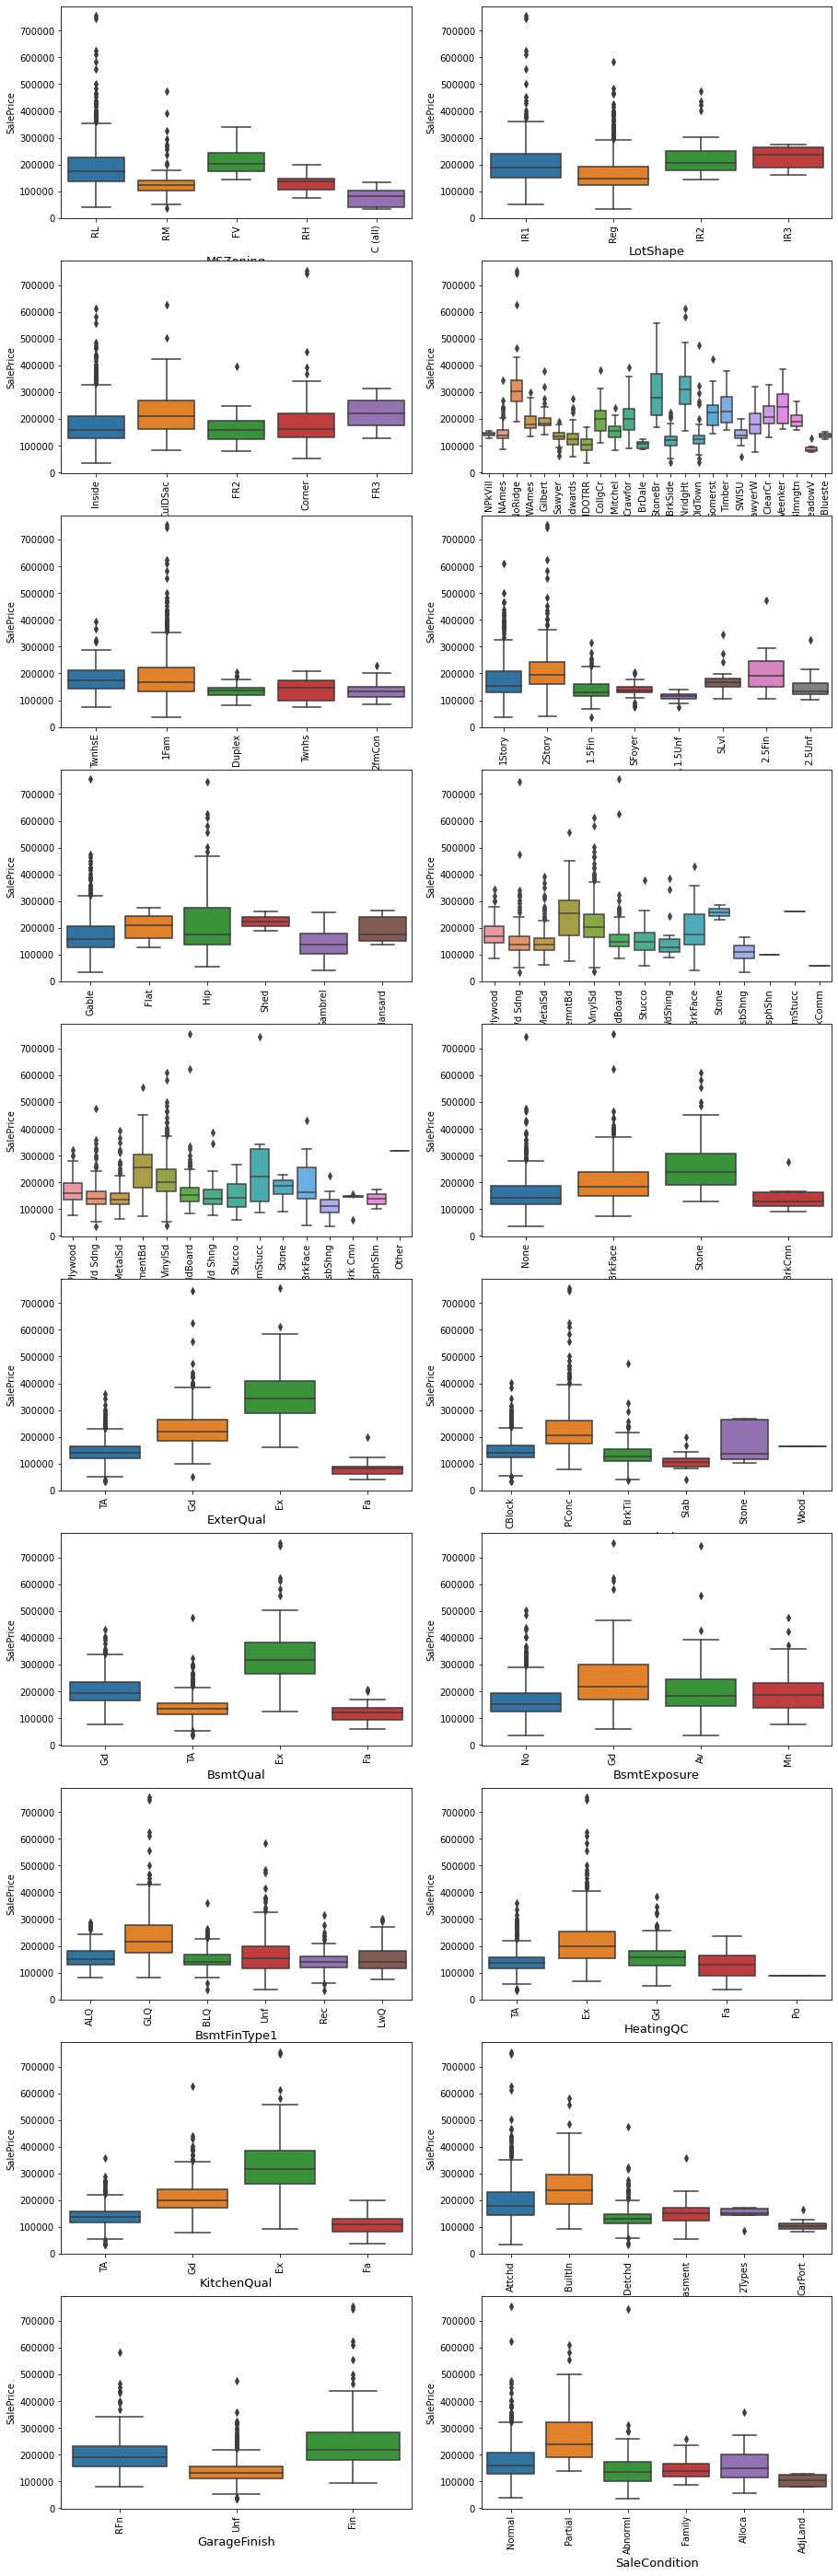

In [41]:
plt.figure(figsize=(15,50),facecolor='white')
plotnumber=1
for column in cat_features:
    if plotnumber<=50:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(x = column, y ='SalePrice', data = df,palette=None)
        plt.xlabel(column,fontsize=13)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout

### Observations:
- High number of `SalePrice` for `MSSubClass` 80 and then 120. 
- `MSZoning` Floating Village Residential has highest number of SalePrice.
- `2Story` and `1Story` buildings have High Number of SalePrice
- Positive correlation of `Overallquality` and `SalePrice`.
- `Neighborhood_Nridght` has high value of SalePrice.
- Building type `TwinSE` and `IFam` have high value of SalePrice.
- `ExternalQuality` has high value in `SalePrice`.
- `BasementQuality` has high value in `SalePrice`.
- House with execellent `Kitchenquality` and `HeatingQC` have `HighestSaleprice`

## Handling Outliers Using Zscore:

In [42]:
## First we separate features having outliers and not categorical
## we can not use zscore for categorical data type
features=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
         'GarageArea','WoodDeckSF','OpenPorchSF']

from scipy.stats import zscore
z_score=zscore(df[features])
abs_z_score=np.abs(z_score)

In [43]:
filtering_entry=(abs_z_score<3).all(axis=1)
df_new=df[filtering_entry]
print('Pervious shpae : ', df.shape)
print('After removing outliers Shape : ', df_new.shape)

Pervious shpae :  (1168, 48)
After removing outliers Shape :  (1076, 48)


In [44]:
loss=(1168-1076)/1168*100
print('The Loss of the data is : ', loss)

The Loss of the data is :  7.876712328767123


## Plotting the Heatmap:

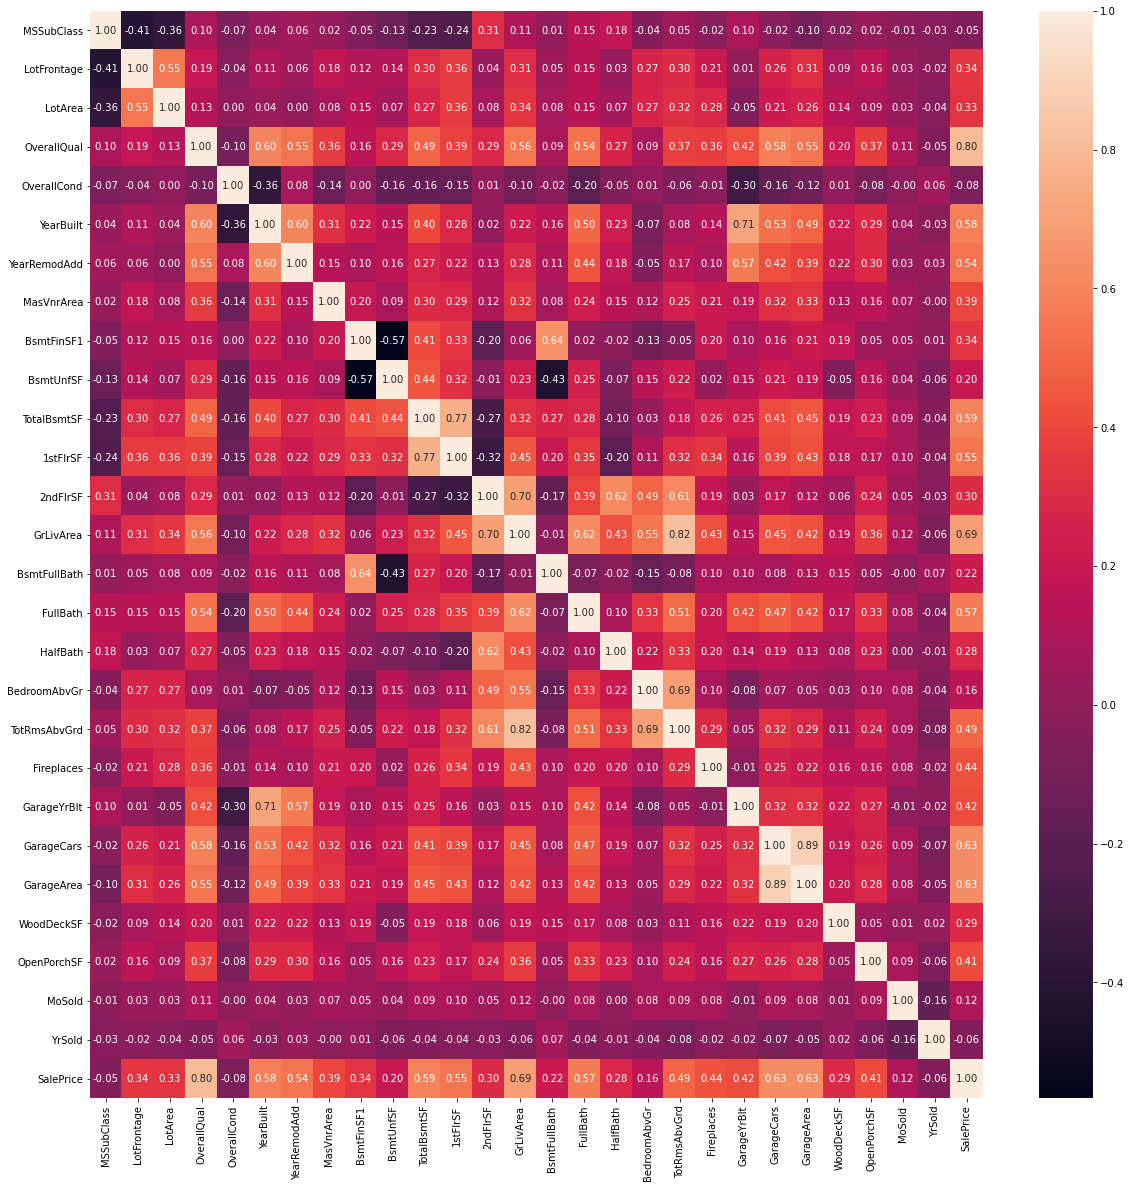

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',linecolor='b')
plt.show()

### Observations of heatmap:
- GarageCars and GarageArea is highly  correlated with each other. Typically we can say that our data set have multicollinearity problem. And also both are equally correlate with target variable.
- GLivArea and TotRmsAbvGrd features are also highly correlate with each other with 80% correlation.
- 1stFlrSF and 2ndFlrSF features are also correalte with each other with 77% correlation.

#### GarageCars & GarageArea

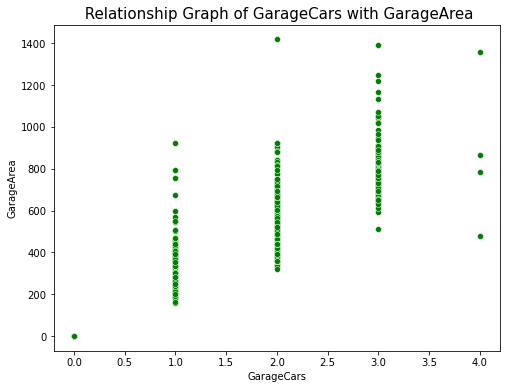

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.GarageCars,y=df.GarageArea,color='g')
plt.title(" Relationship Graph of GarageCars with GarageArea", fontsize=15)
plt.show()

#### GLivArea and TotRmsAbvGrd

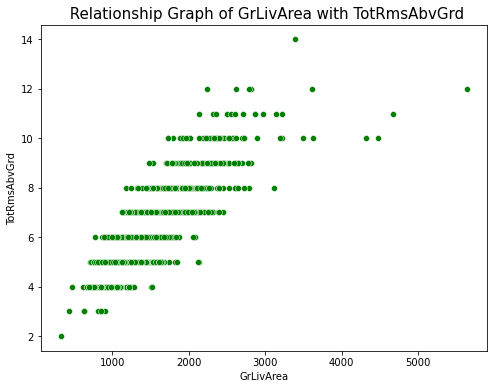

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.GrLivArea,y=df.TotRmsAbvGrd,color='g')
plt.title(" Relationship Graph of GrLivArea with TotRmsAbvGrd", fontsize=15)
plt.show()

### 1stFlrSF and 2ndFlrSF

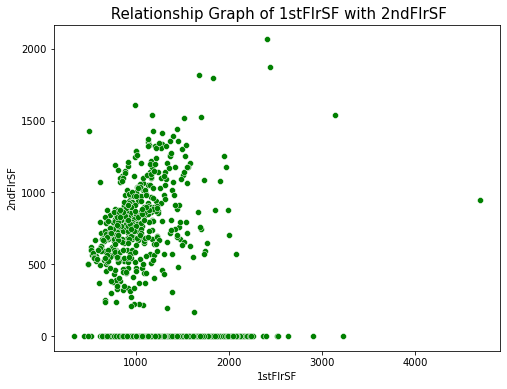

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['1stFlrSF'],y=df['2ndFlrSF'],color='g')
plt.title(" Relationship Graph of 1stFlrSF with 2ndFlrSF", fontsize=15)
plt.show()

### Conclusion:-
- As we assume, all of them showing tight relation with eachother, so we have to drop any 1 feature from every pair.
- GarageCars and GarageArea both are equally correlate with target variable. So we can drop any of them.
- GrLivArea and TotRmsAbvGrd are correalted with target variable as 69% and 49% respectively. So we will drop TotRmsAbvGrd feature as it is less correlate with target with compare to GrLiveArea.
- 1stFlrSF and 2ndFlrSF are correalted with target variable as 55% and 30% respectively. So we will drop 2ndFlrSF feature as it is less correlate with target with compare to 1stFlrSF.

In [49]:
### dropping columns:
df_new.drop(columns=['GarageArea','TotRmsAbvGrd','2ndFlrSF'],inplace=True)

## Correlation With Target:-

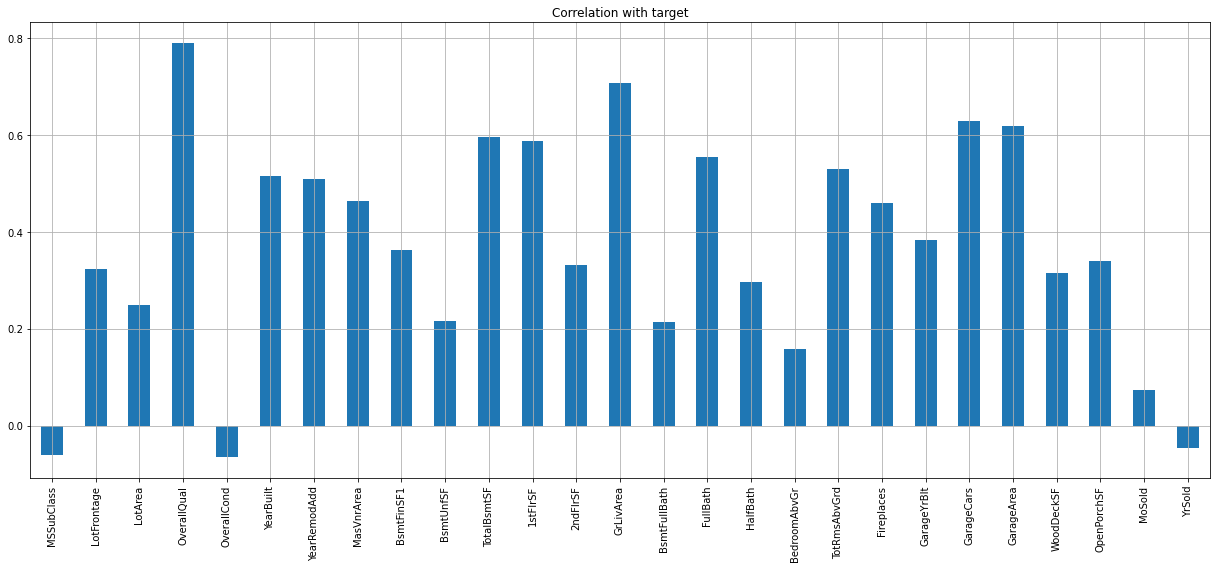

In [50]:
df.drop('SalePrice',axis=1).corrwith(df.SalePrice).plot(kind='bar',grid=True,figsize=(17,8),title='Correlation with target')
plt.tight_layout()

#### Observations:-
- `MSSubClass`, `OverallCond`,  `YrSold` feature are negative correlated with target and in other hand all the features are positive correlated with the target variable.
- `Overallcond` feature is showing highest correlation with target variable. 
- `MoSold` feature is showing least correlation with target variable.

## Checking Skewness:

In [51]:
df_new.skew()

MSSubClass      1.388377
LotFrontage     0.110005
LotArea         1.022552
OverallQual     0.042777
OverallCond     0.519843
YearBuilt      -0.536245
YearRemodAdd   -0.452953
MasVnrArea      1.680824
BsmtFinSF1      0.651824
BsmtUnfSF       0.802220
TotalBsmtSF     0.050343
1stFlrSF        0.627287
GrLivArea       0.548000
BsmtFullBath    0.645642
FullBath        0.034748
HalfBath        0.737691
BedroomAbvGr    0.095399
Fireplaces      0.700893
GarageYrBlt    -0.664003
GarageCars     -0.364266
WoodDeckSF      1.017108
OpenPorchSF     1.490291
MoSold          0.235084
YrSold          0.118833
SalePrice       1.327129
dtype: float64

In [52]:
df_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,120,RL,70.98847,4928,IR1,Inside,NPkVill,TwnhsE,1Story,6,5,1976,1976,Gable,Plywood,Plywood,None,0.0,TA,CBlock,Gd,No,ALQ,120,958,1078,TA,958,958,0,2,0,2,TA,1,Attchd,1977.0,RFn,2,0,205,2,2007,Normal,128000
1,20,RL,95.00000,15865,IR1,Inside,NAmes,1Fam,1Story,8,6,1970,1970,Flat,Wd Sdng,Wd Sdng,None,0.0,Gd,PConc,TA,Gd,ALQ,351,1043,2217,Ex,2217,2217,1,2,0,4,Gd,1,Attchd,1970.0,Unf,2,81,207,10,2007,Normal,268000
2,60,RL,92.00000,9920,IR1,CulDSac,NoRidge,1Fam,2Story,7,5,1996,1997,Gable,MetalSd,MetalSd,None,0.0,Gd,PConc,Gd,Av,GLQ,862,255,1117,Ex,1127,2013,1,2,1,3,TA,1,Attchd,1997.0,Unf,2,180,130,6,2007,Normal,269790
3,20,RL,105.00000,11751,IR1,Inside,NWAmes,1Fam,1Story,6,6,1977,1977,Hip,Plywood,Plywood,BrkFace,480.0,TA,CBlock,Gd,No,BLQ,705,1139,1844,Ex,1844,1844,0,2,0,3,TA,1,Attchd,1977.0,RFn,2,0,122,1,2010,Normal,190000
4,20,RL,70.98847,16635,IR1,FR2,NWAmes,1Fam,1Story,6,7,1977,2000,Gable,CemntBd,CmentBd,Stone,126.0,Gd,CBlock,Gd,No,ALQ,1246,356,1602,Gd,1602,1602,0,2,0,3,Gd,1,Attchd,1977.0,Fin,2,240,0,6,2009,Normal,215000


In [53]:
skewed_feature=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF',
                'GrLivArea','WoodDeckSF','OpenPorchSF']
#from sklearn.preprocessing import PowerTransformer
#pt=PowerTransformer()

for i in skewed_feature:
    df_new[i]=np.cbrt(df_new[i].values.reshape(-1,1))
df_new.skew()
   

MSSubClass      0.548175
LotFrontage     0.110005
LotArea        -0.512480
OverallQual     0.042777
OverallCond     0.519843
YearBuilt      -0.536245
YearRemodAdd   -0.452953
MasVnrArea      0.655612
BsmtFinSF1     -0.359126
BsmtUnfSF      -1.019021
TotalBsmtSF     0.050343
1stFlrSF        0.151633
GrLivArea       0.041105
BsmtFullBath    0.645642
FullBath        0.034748
HalfBath        0.737691
BedroomAbvGr    0.095399
Fireplaces      0.700893
GarageYrBlt    -0.664003
GarageCars     -0.364266
WoodDeckSF      0.244980
OpenPorchSF     0.201126
MoSold          0.235084
YrSold          0.118833
SalePrice       1.327129
dtype: float64

##### We have removed skewness:

## Encoding:

In [54]:
df_new.dtypes

MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
LotShape          object
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF         float64
GrLivArea        float64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
Fireplaces         int64
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
WoodDeckSF       float64


We will apply Encoding technique here.
-  pd.get_dummies()

In [55]:
df=pd.get_dummies(df_new,drop_first=True)


print("Earlier our dataset shape is : ", df_new.shape)
print("After encoding our dataset shape is : ", df.shape)

Earlier our dataset shape is :  (1076, 45)
After encoding our dataset shape is :  (1076, 143)


In [56]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.932424,70.98847,17.017283,6,5,1976,1976,0.000000,4.932424,9.857993,1078,9.857993,9.857993,0,2,0,2,1,1977.0,2,0.000000,5.896369,2,2007,128000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
1,2.714418,95.00000,25.127350,8,6,1970,1970,0.000000,7.054004,10.141327,2217,13.039329,13.039329,1,2,0,4,1,1970.0,2,4.326749,5.915482,10,2007,268000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,3.914868,92.00000,21.486741,7,5,1996,1997,0.000000,9.517052,6.341326,1117,10.406579,12.626450,1,2,1,3,1,1997.0,2,5.646216,5.065797,6,2007,269790,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
3,2.714418,105.00000,22.734825,6,6,1977,1977,7.829735,8.900130,10.443384,1844,12.262725,12.262725,0,2,0,3,1,1977.0,2,0.000000,4.959676,1,2010,190000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
4,2.714418,70.98847,25.527460,6,7,1977,2000,5.013298,10.760671,7.087341,1602,11.700942,11.70094

### Splitting Our DataSet:

In [57]:
x=df.drop('SalePrice',axis=1)
y=df.SalePrice


### Scaling The Dataset:-

In [58]:
## standardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [59]:
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730935,0.442376,0.281425,0.555556,0.500,0.748148,0.433333,0.000000,0.420060,0.794947,0.486243,0.472230,0.391971,0.000000,0.666667,0.0,0.333333,0.333333,0.700000,0.5,0.000000,0.943600,0.090909,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.654867,0.655379,0.777778,0.625,0.703704,0.333333,0.000000,0.600740,0.817795,1.000000,0.986766,0.819058,0.333333,0.666667,0.0,0.666667,0.333333,0.636364,0.5,0.557288,0.946659,0.818182,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.395603,0.628319,0.487511,0.666667,0.500,0.896296,0.783333,0.000000,0.810501,0.511364,0.503834,0.560956,0.763630,0.333333,0.666667,0.5,0.500000,0.333333,0.881818,0.5,0.727236,0.810683,0.454545,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [60]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1076, dtype: int64

## PCA:-

In [61]:
from sklearn.decomposition import PCA
pca=PCA()

pca.fit_transform(x)

array([[-3.51624109e-01, -7.63407639e-01, -2.21067477e-01, ...,
        -4.12843046e-02, -1.82271204e-02,  1.40375214e-02],
       [ 3.92479830e-01, -2.94661780e-01, -1.13977419e+00, ...,
         1.21311311e-02, -2.06978485e-02, -4.08718643e-04],
       [ 8.92459784e-01,  2.80330858e-01,  5.13539797e-01, ...,
        -4.04083265e-03, -9.71289414e-04,  3.49469331e-03],
       ...,
       [-7.74314387e-01, -4.05160012e-04,  9.28091179e-01, ...,
         3.47789459e-02,  1.29915027e-02, -1.15650049e-02],
       [-1.71406105e+00,  1.35525004e+00,  5.19767081e-01, ...,
        -1.08797950e-02,  1.79592136e-02,  8.90750104e-03],
       [ 2.08064553e+00,  6.44879808e-01,  1.93205196e-01, ...,
         1.18925214e-03, -8.45568655e-04,  1.93394789e-03]])

## Plotting the scree plot:

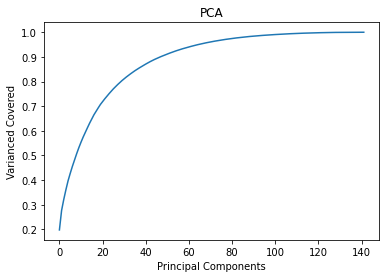

In [62]:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

we can see 80 Principal components are able to explain our data more than 95%. Hence we will take only 80 components.

In [63]:
pca=PCA(n_components=80)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                     'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
                                     'PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70',
                                     'PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
0,-0.351624,-0.763408,-0.221067,-1.028661,-0.617626,-0.793930,0.780836,0.548050,-0.102642,-0.563807,0.223751,1.090871,-0.316352,0.319797,0.793200,0.484450,0.780024,-0.345126,0.214459,-0.106274,0.127086,-0.177324,0.289119,0.070110,0.213516,-0.173871,-0.606126,-0.227969,-0.228860,0.305665,-0.358554,-0.189016,-0.398136,0.080072,-0.170494,0.033783,0.294329,0.107290,-0.154272,-0.447352,-0.007441,-0.252347,-0.022919,-0.105225,0.221598,-0.178376,0.251019,-0.112050,0.123166,-0.030296,0.095672,-0.022206,-0.150831,-0.126684,-0.172200,0.120534,-0.075179,-0.239420,-0.005786,-0.061419,0.136338,0.037743,-0.030512,0.057089,-0.125476,0.200047,0.012545,-0.008542,0.079622,-0.091811,-0.159592,0.035149,-0.286507,0.064977,-0.038325,0.024057,-0.189777,0.039661,-0.209174,0.104209
1,0.392480,-0.294662,-1.139774,0.040904,0.173468,1.752332,-0.170800,0.032192,0.862119,-0.517613,0.342367,0.127145,0.579154,-0.112616,-0.451470,-0.374309,-0.164661,-0.535700,-0.626272,-0.046382,0.316395,-0.149343,0.574564,-0.030857,0.287098,0.794766,0.044540,-0.274217,-0.153789,-0.061130,0.439348,-0.463760,-0.235559,0.549474,0.035704,0.148724,-0.037823,-0.098584,-0.090829,0.058919,-0.255387,0.390445,0.201041,-0.234179,-0.198596,-0.173437,0.066729,-0.050602,0.236078,-0.034648,-0.123770,0.322092,0.079916,0.136118,-0.289689,-0.145676,0.145736,-0.055497,0.091089,-0.141199,0.145945,0.092498,-0.025423,-0.168040,0.287811,0.028931,0.068877,0.118388,-0.303314,-0.163740,-0.216368,0.093330,0.021986,0.056732,0.028634,0.096332,-0.049463,0.040041,0.080357,0.255349
2,0.892460,0.280331,0.513540,-1.447341,0.238026,0.478029,0.205146,-0.711922,-0.829135,-1.070938,0.249705,-0.111041,-0.064444,0.744263,-0.823100,-0.523895,-0.401116,0.173455,-0.407613,0.487342,0.572857,0.330160,-0.059927,-0.208430,-0.338453,0.290136,0.169030,-0.234067,-0.327309,0.195046,0.172425,-0.309149,0.033509,0.143334,-0.040385,0.043407,0.082456,-0.124232,-0.145490,0.086541,0.130923,0.188939,0.128190,-0.334879,0.153637,0.338584,-0.325358,0.000776,-0.007774,0.311497,-0.192969,-0.008253,0.016864,-0.194464,-0.428576,0.055769,-0.037858,0.057630,0.291900,-0.288617,-0.003523,-0.163563,0.075620,-0.055336,-0.243168,-0.304286,-0.057953,-0.152336,0.361943,0.403201,0.027604,-0.055738,-0.060769,0.119248,-0.178102,0.156421,-0.092830,-0.047292,-0.265516,0.166441
3,-0.027838,-1.991806,0.209289,0.504898,-0.336968,-0.178961,0.336094,0.014626,-0.225620,-0.599705,0.101233,1.027399,-1.074939,0.259665,0.642657,0.662572,0.909765,-0.155962,0.400879,-0.324588,0.272733,0.604399,0.449636,0.675530,-0.568534,-0.098306,-0.031930,0.523629,0.133822,-0.183096,0.369114,-0.346047,-0.134219,-0.089316,-0.103006,0.028545,0.058752,-0.035867,-0.195240,-0.251122,0.115121,-0.167153,0.092837,-0.354983,-0.290647,-0.169304,-0.086932,-0.131593,0.128571,-0.086543,0.104110,0.049226,0.138165,0.055178,-0.255247,-0.052500,0.114139,0.100119,-0.108022,0.109400,0.046331,-0.051272,0.018310,0.084241,-0.079889,-0.161712,-0.011761,0.074717,-0.164560,0.035219,-0.126514,-0.012204,0.118096,0.042290,-0.017710,0.017097,0.018207,0.093689,-0.059034,-0.095632
4,0.941420,-0.922216,-0.223895,-0.224970,-0.064183,0.891957,0.607125,0.210618,-0.118553,0.268997,0.490379,-0.080466,-0.388326,0.370364,-0.571942,0.636620,1.081714,0.322128,0.090849,1.069082,-0.436038,0.648370,-0.410393,-0.206057,0.726735,-0.485434,0.313611,0.323434,0.336410,0.123620,0.132858,0.656768,-0.017950,-0.433499,0.536250,-0.049960,-0.428210,0.420261,-0.185141,0.182863,0.027990,0.122865,0.157394,-0.186178,-0.724722,-0.703523,-0.011700,0.000671,-0.046661,-0.005111,-0.142213,0.106885,0.194379,0.317816,-0.214418,0.117092,-0.109934,-0.065903,0.09

## Model Building:-

In [64]:
from sklearn.model_selection import train_test_split as tts


In [65]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
### importing ensemble  models

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

### import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# Define a Function For Best Random State:

In [66]:
def random_state(feature,target):
    max_r2=0
    for i in range(1,101):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.20,random_state=i)
        lr=Lasso()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        if score>max_r2:
            max_r2=score
           
    return i

In [67]:
## Creating a list having all models:
all_model=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(), AdaBoostRegressor(),
           GradientBoostingRegressor(),DecisionTreeRegressor(),SVR(),XGBRegressor(),Lasso(),Ridge()]
model_name=['linear regression','k-nearest neighbors','random forest','adaboost','gradientboosting','decisiontree',
            'svr','xgb','lasso','ridge']

### importing cross validation
from sklearn.model_selection import cross_val_score

## defining a function for model building

In [68]:
def model_building(Models,Features,Target,n):
    x_train,x_test,y_train,y_test=tts(Features,Target,test_size=0.2,random_state=random_state(Features,Target))
    ## creating the empty list
    number=[]
    Mae=[]
    Mse=[]
    Smse=[]
    r2=[]
    MeanCV=[]
    ## building the model
    for i , j in enumerate(Models):
        j.fit(x_train,y_train)
        pred_test=j.predict(x_test)
        ## choosing cv=5
        
        
        
        score=cross_val_score(j,x_train,y_train,cv=5,scoring='r2')
        
        # appending the score with their respective list
        number.append(n[i])
        Mae.append(np.round(MAE(y_test,pred_test),3))
        Mse.append(np.round(MSE(y_test,pred_test),3))
        Smse.append(np.round(np.sqrt(MSE(y_test,pred_test)),3))
        r2.append(np.round(r2_score(y_test,pred_test),2))
        MeanCV.append(np.round(np.mean(score),4))
        
    ## make a dataframe to understand in a better way
    dataframe=pd.DataFrame()
    dataframe['Model_name']=number
    dataframe['Mean Absolute error']=Mae
    dataframe['Mean Squared error']=Mse
    dataframe['SquareRoot of Mean Squared error']=Smse
    dataframe["Model's R2 Score "]=r2
    dataframe['Mean of the Cross Validation']=MeanCV
    dataframe.set_index('Model_name',inplace=True)
    return dataframe
    

## Model's Score Without PCA:

In [69]:
model_building(all_model,x,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,1.052116e+16,1.195505e+34,1.093391e+17,-2.864563e+24,-4.262210e+23
k-nearest neighbors,2.454501e+04,1.185859e+09,3.443630e+04,7.200000e-01,7.274000e-01
random forest,1.605418e+04,5.962916e+08,2.441908e+04,8.600000e-01,8.576000e-01
adaboost,1.956740e+04,7.697920e+08,2.774512e+04,8.200000e-01,8.042000e-01
gradientboosting,1.493232e+04,4.927441e+08,2.219784e+04,8.800000e-01,8.944000e-01
decisiontree,2.340698e+04,1.006098e+09,3.171904e+04,7.600000e-01,6.395000e-01
svr,4.910480e+04,4.261295e+09,6.527859e+04,-2.000000e-02,-4.460000e-02
xgb,1.632865e+04,6.192984e+08,2.488571e+04,8.500000e-01,8.777000e-01
lasso,1.645472e+04,5.131147e+08,2.265203e+04,8.800000e-01,8.782000e-01


As we can see that our model's are not performing well with simply scaled data. 

let's see the performance of model with components.

## Model's Score With PCA:

In [70]:
model_building(all_model,x_comp,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,16519.965,5.273115e+08,22963.264,0.87,0.8679
k-nearest neighbors,23940.245,1.157838e+09,34027.020,0.72,0.7261
random forest,24365.380,1.084690e+09,32934.628,0.74,0.7211
adaboost,28199.739,1.334151e+09,36526.027,0.68,0.6812
gradientboosting,22595.455,9.181719e+08,30301.351,0.78,0.7651
decisiontree,34782.852,2.546164e+09,50459.532,0.39,0.4449
svr,49110.292,4.262086e+09,65284.651,-0.02,-0.0447
xgb,25197.101,1.193476e+09,34546.723,0.71,0.7122
lasso,16512.203,5.270676e+08,22957.953,0.87,0.8680


- As we can see that our model's are performing quite well with components:

## Best Fit Models: `Lasso` & `Ridge`
##  `Lasso` and `Ridge` models are giving us the Best Performance Let's Tune the Parameters for them.

In [71]:
random_state(x_comp,y)

100

In [72]:
## importing required libraries:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Regularization:


In [73]:
from sklearn.linear_model import LassoCV , RidgeCV

## Lasso:-

In [74]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.2,random_state=100)
lasso_cv=LassoCV(alphas=None,max_iter=10000,random_state=None)
lasso_cv.fit(x_train,y_train)

LassoCV(max_iter=10000)

In [75]:
alpha=lasso_cv.alpha_
alpha

67.25822175329047

In [76]:
lasso=Lasso(alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=67.25822175329047)

In [77]:
lasso.score(x_test,y_test)

0.8766188378636598

In [85]:
lasso=Lasso(alpha=67.25822175334903)
lasso.fit(x_train,y_train)
prediction=lasso.predict(x_test)
score=cross_val_score(lasso,x_comp,y,cv=5)
score

array([0.89786942, 0.87358871, 0.86997128, 0.8838967 , 0.84775214])

## Model Evaluation:

In [79]:
print('Mean_Absolute_Error is : ',round(MAE(y_test,prediction),3))
print('Mean_Squared_Error is : ', round(MSE(y_test,prediction),3))

print('Root Mean Sqaured Error is : ', round(np.sqrt(MSE(y_test,prediction)),3))
print('R2 Score of the model is : ', round(r2_score(y_test,prediction),3)*100,'%')
print('Mean of cross validation score is : ', round(np.mean(score),3)*100,'%')

Mean_Absolute_Error is :  16010.401
Mean_Squared_Error is :  514922270.502
Root Mean Sqaured Error is :  22691.899
R2 Score of the model is :  87.7 %
Mean of cross validation score is :  87.5 %


## Visualize the Lasso model's predictions:

Text(0.5, 1.0, 'Lasso Model prediction')

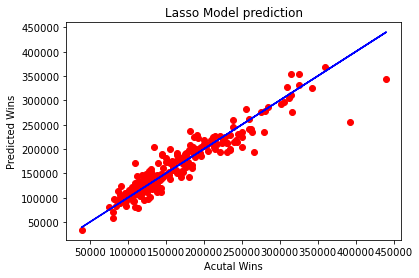

In [80]:
plt.scatter(x=y_test,y=prediction,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal Wins')
plt.ylabel('Predicted Wins')
plt.title('Lasso Model prediction')

## Ridge:

In [81]:
ridgecv=RidgeCV(alphas=np.arange(0.00001,10,0.1),normalize=True)
ridgecv.fit(x_train,y_train)
alpha=ridgecv.alpha_
ridge=Ridge(alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=1e-05)

In [82]:
pred=ridge.predict(x_test)

## Model Evaluation for Ridge:

In [83]:
print('Mean_Absolute_Error is : ',round(MAE(y_test,pred),3))
print('Mean_Squared_Error is : ', round(MSE(y_test,pred),3))

print('Root Mean Sqaured Error is : ', round(np.sqrt(MSE(y_test,pred)),3))
print('R2 Score of the model is : ', round(r2_score(y_test,pred),3)*100,'%')
print('Mean of cross validation score is : ', round(np.mean(score),3)*100,'%')

Mean_Absolute_Error is :  16519.964
Mean_Squared_Error is :  527311407.714
Root Mean Sqaured Error is :  22963.262
R2 Score of the model is :  87.4 %
Mean of cross validation score is :  87.5 %


## Visualize the Ridge Graph:

Text(0.5, 1.0, 'Lasso Model prediction')

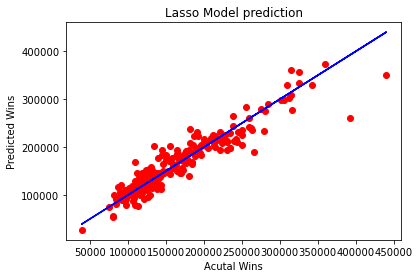

In [84]:
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal Wins')
plt.ylabel('Predicted Wins')
plt.title('Lasso Model prediction')

## Actual Vs Predicted:

In [86]:
original=np.array(y_test)
predicted=np.array(lasso.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,89500,105676.358253
1,130000,153639.550381
2,135000,128166.922654
3,184000,160365.889782
4,137000,133304.764846
...,...,...
211,221000,227262.923260
212,172785,178567.524490
213,172500,169418.117360
214,250000,234882.857160


## ` Let's predict the SalePrice for Test Data Set`

# TestData Set:-

In [87]:
## importing the dataset:
test_df=pd.read_csv(r"test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [88]:
test_df.shape

(292, 80)

In [89]:
### dropping ID
test_df.drop('Id',axis=1,inplace=True)

In [90]:
### Checking Nulls:
for i in test_df.columns:
    if test_df[i].isna().any()==True:
        print("************{}***************".format(i))
        print(test_df[i].isna().sum())

************LotFrontage***************
45
************Alley***************
278
************MasVnrType***************
1
************MasVnrArea***************
1
************BsmtQual***************
7
************BsmtCond***************
7
************BsmtExposure***************
7
************BsmtFinType1***************
7
************BsmtFinType2***************
7
************Electrical***************
1
************FireplaceQu***************
139
************GarageType***************
17
************GarageYrBlt***************
17
************GarageFinish***************
17
************GarageQual***************
17
************GarageCond***************
17
************PoolQC***************
292
************Fence***************
248
************MiscFeature***************
282


In [91]:
dropping_columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Utilities']
test_df.drop(columns=dropping_columns,inplace=True)

In [92]:
## dropping those columns where maximum value of that particular column having holding 90% data.
Empty_list=[]
for i in test_df.columns:
    if test_df[i].value_counts().max()>len(test_df.index)*85/100:
        Empty_list.append(i)
        test_df.drop(i,axis=1,inplace=True)
print("Total Number of Column removed : ", len(Empty_list))
print("Removing columns names are : ", Empty_list)

Total Number of Column removed :  27
Removing columns names are :  ['Street', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']


In [93]:
test_df.shape

(292, 46)

In [94]:
### fill Nan's
for i in test_df.columns:
    if test_df[i].isna().sum()>0:
        print("*****{}*****".format(i))
        print(test_df[i].isna().sum())

*****LotFrontage*****
45
*****MasVnrType*****
1
*****MasVnrArea*****
1
*****BsmtQual*****
7
*****BsmtExposure*****
7
*****BsmtFinType1*****
7
*****GarageType*****
17
*****GarageYrBlt*****
17
*****GarageFinish*****
17


In [95]:
 # Replacing the values of Categorical Columns with the mode.

test_df.GarageFinish=test_df.GarageFinish.fillna(test_df.GarageFinish.mode()[0])
test_df.MasVnrType=test_df.MasVnrType.fillna(test_df.MasVnrType.mode()[0])
test_df.GarageYrBlt=test_df.GarageYrBlt.fillna(test_df.GarageYrBlt.mode()[0])
test_df.GarageType=test_df.GarageType.fillna(test_df.GarageType.mode()[0])
test_df.BsmtFinType1=test_df.BsmtFinType1.fillna(test_df.BsmtFinType1.mode()[0])
test_df.BsmtQual=test_df.BsmtQual.fillna(test_df.BsmtQual.mode()[0])
test_df.BsmtExposure=test_df.BsmtExposure.fillna(test_df.BsmtExposure.mode()[0])

In [96]:
# Replacing the values of continous Columns with the mean.
test_df.LotFrontage=test_df.LotFrontage.fillna(test_df.LotFrontage.mean())
test_df.MasVnrArea=test_df.MasVnrArea.fillna(test_df.MasVnrArea.mean())

In [97]:
## Checking nullls now:
test_df.isna().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
LotConfig       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

In [98]:
## First we separate features having outliers and not categorical
## we can not use zscore for categorical data type
features=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
         'GarageArea','WoodDeckSF','OpenPorchSF']

from scipy.stats import zscore
z_score=zscore(test_df[features])
abs_z_score=np.abs(z_score)




In [99]:
filtering_entry=(abs_z_score<3).all(axis=1)
test_df_new=test_df[filtering_entry]
print('Pervious shpae : ', test_df.shape)
print('After removing outliers Shape : ', test_df_new.shape)


loss=(1168-1076)/1168*100
print('The Loss of the data is : ', loss)

Pervious shpae :  (292, 46)
After removing outliers Shape :  (265, 46)
The Loss of the data is :  7.876712328767123


In [100]:
### handling skewness:
test_df_new.skew()

MSSubClass      1.357665
LotFrontage    -0.101865
LotArea         1.758235
OverallQual     0.296983
OverallCond     1.210832
YearBuilt      -0.736853
YearRemodAdd   -0.497621
MasVnrArea      1.585145
BsmtFinSF1      0.779983
BsmtUnfSF       0.873152
TotalBsmtSF     0.173648
1stFlrSF        0.690652
2ndFlrSF        0.670787
GrLivArea       0.608351
BsmtFullBath    0.486363
FullBath       -0.174433
HalfBath        0.855344
BedroomAbvGr    0.002668
TotRmsAbvGrd    0.600763
Fireplaces      0.570976
GarageYrBlt    -0.742459
GarageCars     -0.303111
GarageArea      0.103260
WoodDeckSF      1.276139
OpenPorchSF     1.632997
MoSold          0.172581
YrSold          0.006628
dtype: float64

In [101]:
skewed_feature=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF',
                'GrLivArea','WoodDeckSF','OpenPorchSF']
#from sklearn.preprocessing import PowerTransformer
#pt=PowerTransformer()

for i in skewed_feature:
    test_df_new[i]=np.cbrt(test_df_new[i].values.reshape(-1,1))
test_df_new.skew()
   

MSSubClass      0.598868
LotFrontage    -0.101865
LotArea        -0.350047
OverallQual     0.296983
OverallCond     1.210832
YearBuilt      -0.736853
YearRemodAdd   -0.497621
MasVnrArea      0.627033
BsmtFinSF1     -0.368864
BsmtUnfSF      -1.202435
TotalBsmtSF     0.173648
1stFlrSF        0.247185
2ndFlrSF        0.670787
GrLivArea       0.040099
BsmtFullBath    0.486363
FullBath       -0.174433
HalfBath        0.855344
BedroomAbvGr    0.002668
TotRmsAbvGrd    0.600763
Fireplaces      0.570976
GarageYrBlt    -0.742459
GarageCars     -0.303111
GarageArea      0.103260
WoodDeckSF      0.393069
OpenPorchSF     0.064349
MoSold          0.172581
YrSold          0.006628
dtype: float64

In [102]:
### Encoding:
test_df=pd.get_dummies(test_df_new,drop_first=True)


print("Earlier our dataset shape is : ", test_df_new.shape)
print("After encoding our dataset shape is : ", test_df.shape)

Earlier our dataset shape is :  (265, 46)
After encoding our dataset shape is :  (265, 131)


### Scaling The Dataset:-

In [103]:
## standardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [104]:
for i in test_df.columns:
    test_df[i]=scaler.fit_transform(test_df[i].values.reshape(-1,1))
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_FV,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,0.000000,0.631068,0.585371,0.857143,0.333333,0.970803,0.933333,0.685456,0.912104,0.726794,0.910900,0.923980,0.000000,0.711459,0.5,0.666667,0.0,0.500000,0.555556,0.5,0.946809,0.75,0.642586,0.735158,0.601799,0.545455,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730935,0.441020,0.298661,0.714286,0.333333,0.817518,0.566667,0.000000,0.856992,0.471714,0.578199,0.685297,0.000000,0.492126,0.5,0.333333,0.0,0.166667,0.111111,0.5,0.723404,0.50,0.537072,0.520021,0.000000,0.636364,0.75,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.441020,0.520713,0.714286,0.333333,0.941606,0.850000,0.000000,0.000000,1.000000,0.830806,0.871810,0.000000,0.663519,0.0,0.666667,0.0,0.500000,0.444444,0.5,0.904255,0.50,0.496198,0.766816,0.864146,0.454545,0.75,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

## PCA:-

In [105]:
from sklearn.decomposition import PCA
pca=PCA()

pca.fit_transform(test_df)

array([[ 2.33685385e+00,  1.09457216e+00, -1.09833585e+00, ...,
        -1.54755486e-16,  5.48711217e-17, -1.97129761e-16],
       [ 9.83866746e-01,  1.10154730e+00,  1.92737454e-01, ...,
         6.49701998e-18, -2.57365441e-16,  9.78220311e-18],
       [ 1.83191140e+00, -2.88768934e-01, -1.11912610e+00, ...,
        -2.50165232e-16,  1.05253551e-16,  1.47535432e-16],
       ...,
       [-1.03897848e+00,  1.59781599e+00, -1.64044227e-01, ...,
        -5.29413866e-17,  6.46064908e-17,  9.41906128e-17],
       [-1.69193072e+00, -5.37143026e-01,  3.20858066e-01, ...,
        -6.36086413e-17,  7.51921265e-18,  3.61969537e-17],
       [-1.65103625e+00,  2.03357321e-01,  1.67775609e+00, ...,
         5.53331114e-17,  1.90658641e-16,  6.84507113e-17]])

In [106]:
pca=PCA(n_components=80)
new_comp=pca.fit_transform(test_df)
test_df_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                     'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
                                     'PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70',
                                     'PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80'])
test_df_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
0,2.336854,1.094572,-1.098336,0.576428,-0.202104,-0.460947,-0.107284,0.970507,0.354214,-0.821732,0.336130,0.002038,0.179780,-0.405292,-0.051192,-0.094887,0.041958,0.185465,-0.425677,-0.134581,-0.124950,0.090679,0.201357,-0.254471,0.156905,0.039285,-0.417729,0.031945,0.064815,0.164727,-0.033988,0.122630,0.002549,-0.055580,-0.104621,0.011514,0.073131,0.013439,0.148575,-0.288152,0.180224,0.134593,0.220744,-0.112560,0.033819,0.188796,-0.050578,0.051046,-0.211161,-0.087747,-0.282485,-0.306306,-0.037468,-0.138671,-0.273146,-0.124426,-0.370051,0.165022,0.674317,-0.063973,-0.054251,0.071998,-0.021402,0.148615,-0.170802,-0.047430,0.154091,-0.347909,0.122000,-0.119799,0.001051,0.025330,0.091694,0.091319,-0.244757,-0.039437,0.139258,0.017421,-0.084541,-0.115931
1,0.983867,1.101547,0.192737,-0.055697,1.553963,-0.984321,0.852445,-0.687392,0.018309,0.215227,1.336000,-0.114270,-0.257695,0.525678,-0.425997,-0.187857,-0.079408,0.311459,-0.707745,-0.428156,0.726495,0.294278,-0.122017,0.126207,-0.120658,-0.259868,0.120432,-0.442633,0.394950,0.067708,-0.277660,-0.160402,0.228511,-0.355130,0.444359,-0.343531,0.138247,-0.218680,0.212665,0.013473,0.054384,0.473915,0.248600,0.111911,0.068624,0.137903,0.118387,-0.131395,0.072175,0.068723,-0.154605,-0.092256,-0.090165,-0.000347,-0.174361,0.053124,-0.055622,0.047261,0.291516,0.179852,0.132865,-0.022552,0.156443,0.287553,-0.249917,-0.230742,-0.195829,-0.075184,0.115304,-0.154692,0.043524,0.238854,0.104284,-0.103588,-0.306860,0.104874,0.083445,-0.010917,-0.007488,0.145951
2,1.831911,-0.288769,-1.119126,-0.682803,-0.516342,-0.325954,0.352445,0.661758,-0.817680,-0.200633,-0.395265,0.301451,-0.494339,0.680799,-0.634307,0.253881,-0.118455,0.033770,0.093921,-0.233075,-0.244545,0.327457,-0.248688,-0.189446,-0.322670,0.277338,0.489790,-0.247161,-0.073814,-0.001475,0.276359,0.193764,0.146422,-0.503421,0.087958,-0.184575,0.080482,-0.185760,-0.169018,0.310502,0.077566,0.025675,0.009226,-0.149611,-0.077155,-0.152078,-0.064374,-0.063817,0.158378,0.179177,-0.029691,0.145312,0.193549,0.164308,-0.046043,0.162137,0.057504,-0.106282,-0.113118,-0.099869,0.219394,0.012750,-0.156990,-0.100384,-0.052345,0.040549,0.017409,0.159225,0.067549,0.076284,0.054558,-0.014098,0.044393,0.140191,0.090269,-0.082576,0.043452,-0.002490,-0.032933,0.066734
3,-1.425534,-0.244224,0.752331,0.237226,-0.276456,-0.967444,-1.177222,-0.107193,0.260780,0.230197,-0.386013,-0.447866,-0.022780,0.050672,-0.236789,0.493410,-0.555274,0.058777,0.336778,0.365825,0.479264,0.448155,0.245012,0.035369,-0.316186,-0.125347,0.094778,0.034270,0.170351,-0.672048,-0.159635,0.264007,-0.018091,-0.149102,0.493382,0.223799,0.163886,-0.139641,-0.271869,-0.429492,0.621013,-0.202022,0.229051,0.020714,0.279329,0.016986,0.353750,-0.060993,-0.036247,0.222525,-0.067783,0.126713,0.100700,0.027210,-0.043267,0.373045,-0.062388,-0.071909,-0.124106,0.067979,0.273905,0.057781,0.382624,0.194994,-0.395582,0.144842,-0.126588,0.176397,0.143942,0.168034,0.002759,-0.113166,-0.124377,0.214226,-0.061841,0.164157,-0.122353,0.115362,-0.102282,-0.188877
4,2.297395,-0.621384,0.821297,-0.533028,-0.327744,-0.655472,0.242993,0.160147,0.831056,-1.039539,-0.144390,0.444514,0.313672,-0.589815,-0.325337,-0.502746,-0.128749,0.710032,0.273142,-0.193692,0.527325,0.189440,-0.136975,0.196681,0.066514,-0.382355,0.022885,0.106062,0.234702,-0.081106,-0.169505,-0.045375,-0.076596,0.070959,-0.405138,0.038133,-0.490057,0.935988,0.089825,0.118931,-0.425304,-0.139613,-0.055704,-0.035744,-0.183961,-0.197195,0.262716,-0.152251,-0.011779,0.147973,-0.161292,-0.052120,-0.273526,0.007456,-0.170802,-0.105526,0.221274,-0.171425,0.073043,0.0

## Test Data Predictions:-

In [107]:
prediction=lasso.predict(test_df_comp)
prediction

array([257924.96838115, 163965.91044935, 197038.79064448, 130870.90157487,
       277393.38845797, 142845.11790058, 315603.98925902, 225944.60504657,
       253725.3888604 , 148202.23508034,  55126.6407816 ,  76021.61818363,
       122802.14522624, 152083.48708969, 149268.6986924 , 181139.28328102,
       161811.01999689, 123236.33027643, 144344.38719102, 123417.46267216,
       260919.14911447,  96703.02397864, 125741.95142779, 155147.18164475,
       105781.86394864, 134945.16164328,  77263.33543058, 222506.55613951,
       203787.60938612, 111131.91265119, 197171.22105139, 144514.45756601,
       208922.30496348, 217745.11628221, 156770.33233784, 170936.10217287,
       146866.97245963, 262429.4507602 , 274571.54268888, 183973.82398517,
       191891.47004278, 131824.54175215,  97502.30419546, 105885.76997866,
       211405.52786681, 189629.46359855, 123130.87032638, 165556.2889597 ,
       125508.12695993, 112751.37037206, 195441.19192392, 141628.97351392,
       229367.50399004, 1

### Creating a DataFrame:

In [108]:
pred_price=pd.DataFrame({'Test Score':prediction})
pred_price

,Test Score
0,257924.968381
1,163965.910449
2,197038.790644
3,130870.901575
4,277393.388458
...,...
260,137319.230561
261,142645.541668
262,165148.438891
263,122046.823055
